In [700]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import re
import string
from tensorflow.keras.models import load_model

import nltk

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


## Data loading

In [10]:
import pandas as pd
import os
import json

folder_path = "/Users/hotpotato/Desktop/Final Project/IMDb Review Dataset - ebD"

# Import the IMDb review dataset
file_list = [f"part-0{i}.json" for i in range(1, 7)]
full_paths = [os.path.join(folder_path, file) for file in file_list]

dataframes = []
for path in full_paths:
    with open(path, 'r') as f:
        lines = [json.loads(line) for line in f]
        df = pd.DataFrame(lines)
        dataframes.append(df)

# Combined all data
df_raw = pd.concat(dataframes, ignore_index=True)

# Show the part of result
df_raw.head()


,0,1,2,3,4,5,6,7,8,9,...,1018990,1018991,1018992,1018993,1018994,1018995,1018996,1018997,1018998,1018999
0,"{'review_id': 'rw5704482', 'reviewer': 'raeldo...","{'review_id': 'rw5704483', 'reviewer': 'doslee...","{'review_id': 'rw5704484', 'reviewer': 'bright...","{'review_id': 'rw5704485', 'reviewer': 'gascon...","{'review_id': 'rw5704487', 'reviewer': 'mmason...","{'review_id': 'rw5704488', 'reviewer': 'schroe...","{'review_id': 'rw5704489', 'reviewer': 'welhof...","{'review_id': 'rw5704490', 'reviewer': 'Evasta...","{'review_id': 'rw5704491', 'reviewer': 'tioeta...","{'review_id': 'rw5704492', 'reviewer': 'stephe...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'review_id': 'rw0983000', 'reviewer': 'ACitiz...","{'review_id': 'rw0983001', 'reviewer': 'awesti...","{'review_id': 'rw0983002', 'reviewer': 'tarbos...","{'review_id': 'rw0983003', 'reviewer': 'german...","{'review_id': 'rw0983004', 'reviewer': 'Awesom...","{'review_id': 'rw0983005', 'reviewer': 'fevzim...","{'review_id': 'rw0983006', 'reviewer': 'yoshij...","{'review_id': 'rw0983007', 'reviewer': 'bnixon...","{'review_id': 'rw0983008', 'reviewer': 'Living...","{'review_id': 'rw0983009', 'reviewer': 'TooSho...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'review_id': 'rw0400504', 'reviewer': 'kevgtc...","{'review_id': 'rw0400505', 'reviewer': 'DaniXa...","{'review_id': 'rw0400506', 'reviewer': 'ted_th...","{'review_id': 'rw0400508', 'reviewer': 'Kmk122...","{'review_id': 'rw0400509', 'reviewer': 'Dave #...","{'review_id': 'rw0400511', 'reviewer': 'Dereks...","{'review_id': 'rw0400510', 'reviewer': 'tjw197...","{'review_id': 'rw0400513', 'reviewer': 'dcsbeb...","{'review_id': 'rw0400512', 'reviewer': 'PopRox...","{'review_id': 'rw0400515', 'reviewer': 'studio...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'review_id': 'rw1528871', 'reviewer': 'Arlis'...","{'review_id': 'rw1528872', 'reviewer': 'Doorma...","{'review_id': 'rw1528873', 'reviewer': 'Chip_d...","{'review_id': 'rw1528874', 'reviewer': 'christ...","{'review_id': 'rw1528875', 'reviewer': 'christ...","{'review_id': 'rw1528876', 'reviewer': 'loydmo...","{'review_id': 'rw1528877', 'reviewer': 'Arlis'...","{'review_id': 'rw1528878', 'reviewer': 'edwagr...","{'review_id': 'rw1528879', 'reviewer': 'damort...","{'review_id': 'rw1528880', 'reviewer': 'Arlis'...",...,"{'review_id': 'rw1012570', 'reviewer': 'cestmo...","{'review_id': 'rw1012571', 'reviewer': 'helple...","{'review_id': 'rw1012572', 'reviewer': 'saintb...","{'review_id': 'rw1012573', 'reviewer': 'PulpFi...","{'review_id': 'rw1012574', 'reviewer': 'curiou...","{'review_id': 'rw1012575', 'reviewer': 'violab...","{'review_id': 'rw1012576', 'reviewer': 'Vodsto...","{'review_id': 'rw1012577', 'reviewer': 'maddie...","{'review_id': 'rw1012578', 'reviewer': 'tomimt...","{'review_id': 'rw1012579', 'reviewer': 'zgamer..."
4,"{'review_id': 'rw1133942', 'reviewer': 'Origin...","{'review_id': 'rw1133943', 'reviewer': 'sentra...","{'review_id': 'rw1133946', 'reviewer': 'Greenw...","{'review_id': 'rw1133948', 'reviewer': 'itsasc...","{'review_id': 'rw1133949', 'reviewer': 'Origin...","{'review_id': 'rw1133950', 'reviewer': 'Aaron1...","{'review_id': 'rw1133952', 'reviewer': 'TheFil...","{'review_id': 'rw1133953', 'reviewer': 'swanso...","{'review_id': 'rw1133954', 'reviewer': 'diand_...","{'review_id': 'rw1133955', 'reviewer': 'btillm...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#  转置 DataFrame，使每列变为一行
flattened_reviews = df_raw.transpose().reset_index(drop=True)

# Flatten the dict in each column
flattened_reviews = pd.json_normalize(flattened_reviews[0])

print(flattened_reviews.columns)
flattened_reviews.head()


Index(['review_id', 'reviewer', 'movie', 'rating', 'review_summary',
       'review_date', 'spoiler_tag', 'review_detail', 'helpful'],
      dtype='object')


,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
0,rw5704482,raeldor-96879,After Life (2019– ),9,Very Strong Season 2,3 May 2020,0.0,"I enjoyed the first season, but I must say I t...","[1, 1]"
1,rw5704483,dosleeb,The Valhalla Murders (2019– ),6,Icelandic detectives?,3 May 2020,0.0,I know Iceland is a small country and police d...,"[2, 2]"
2,rw5704484,brightconscious,Special OPS (2020– ),7,Nothing special,3 May 2020,0.0,"Except K K , no other actor looks comfortable ...","[0, 0]"
3,rw5704485,gasconyway,#BlackAF (2020– ),8,Good but,3 May 2020,0.0,I'm guessing that as a 62 year old white woman...,"[5, 9]"
4,rw5704487,mmason-15867,The Droving (2020),2,An honest review,3 May 2020,0.0,Here's the truth. There's not much to this mov...,"[26, 41]"


In [69]:
flattened_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019000 entries, 0 to 1018999
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   review_id       1010293 non-null  object 
 1   reviewer        1010293 non-null  object 
 2   movie           1010293 non-null  object 
 3   rating          958773 non-null   object 
 4   review_summary  1010293 non-null  object 
 5   review_date     1010293 non-null  object 
 6   spoiler_tag     1010293 non-null  float64
 7   review_detail   1010293 non-null  object 
 8   helpful         1010293 non-null  object 
dtypes: float64(1), object(8)
memory usage: 70.0+ MB


In [70]:
flattened_reviews.isnull().sum()

review_id          8707
reviewer           8707
movie              8707
rating            60227
review_summary     8707
review_date        8707
spoiler_tag        8707
review_detail      8707
helpful            8707
dtype: int64

In [115]:
flattened_reviews.groupby('rating').describe()

spoiler_tag                                             
             count      mean       std  min  25%  50%  75%  max
rating                                                         
1         111357.0  0.179647  0.383895  0.0  0.0  0.0  0.0  1.0
10        249976.0  0.124668  0.330343  0.0  0.0  0.0  0.0  1.0
2          42242.0  0.218929  0.413525  0.0  0.0  0.0  0.0  1.0
3          43668.0  0.229665  0.420622  0.0  0.0  0.0  0.0  1.0
4          44636.0  0.265548  0.441630  0.0  0.0  0.0  1.0  1.0
5          58654.0  0.236335  0.424834  0.0  0.0  0.0  0.0  1.0
6          74483.0  0.235195  0.424123  0.0  0.0  0.0  0.0  1.0
7          99790.0  0.219060  0.413611  0.0  0.0  0.0  0.0  1.0
8         121886.0  0.205208  0.403855  0.0  0.0  0.0  0.0  1.0
9         112081.0  0.168191  0.374037  0.0  0.0  0.0  0.0  1.0

## First Simple data cleaning

In [32]:
def clean_reviews_data(df):
    df = df.dropna(subset=["review_id"])
    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
    df = df.dropna(subset=["rating"])
    df = df[df["rating"].between(1, 10, inclusive="both")]

    text_cols = ["reviewer", "movie", "review_summary", "review_detail"]
    for col in text_cols:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip()

    if "review_date" in df.columns:
        df["review_date"] = pd.to_datetime(df["review_date"], errors="coerce")
        df = df.dropna(subset=["review_date"])

    if "spoiler_tag" in df.columns:
        valid_tags = ["NO", "YES"]
        df.loc[~df["spoiler_tag"].isin(valid_tags), "spoiler_tag"] = np.nan

    return df


In [34]:
df_cleaned = clean_reviews_data(flattened_reviews)
df_cleaned.head()

/var/folders/x6/dbkrtxl50n57204wss8d8p5r0000gn/T/ipykernel_42264/3822904002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rating"] = pd.to_numeric(df["rating"], errors="coerce")


,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
0,rw5704482,raeldor-96879,After Life (2019– ),9.0,Very Strong Season 2,2020-05-03,NaN,"I enjoyed the first season, but I must say I t...","[1, 1]"
1,rw5704483,dosleeb,The Valhalla Murders (2019– ),6.0,Icelandic detectives?,2020-05-03,NaN,I know Iceland is a small country and police d...,"[2, 2]"
2,rw5704484,brightconscious,Special OPS (2020– ),7.0,Nothing special,2020-05-03,NaN,"Except K K , no other actor looks comfortable ...","[0, 0]"
3,rw5704485,gasconyway,#BlackAF (2020– ),8.0,Good but,2020-05-03,NaN,I'm guessing that as a 62 year old white woman...,"[5, 9]"
4,rw5704487,mmason-15867,The Droving (2020),2.0,An honest review,2020-05-03,NaN,Here's the truth. There's not much to this mov...,"[26, 41]"


In [68]:

# let's modify the data to add more useful information for later
df_cleaned[["helpful_yes", "helpful_plus_not_helpful"]] = df_cleaned['helpful'].apply(pd.Series)

# casting from original strings to ints, but before that removing the "," as there are some big numbers like "1,264" causing issues
df_cleaned["helpful_yes"] = df_cleaned["helpful_yes"].str.replace(',', '').astype("int16")
df_cleaned["helpful_plus_not_helpful"] = df_cleaned["helpful_plus_not_helpful"].str.replace(',', '').astype("int16")
df_cleaned["helpful_ratio"] = df_cleaned["helpful_yes"] / df_cleaned["helpful_plus_not_helpful"]

# and let's check the data
display(df_cleaned.head())
display(df_cleaned.describe(include="all"))
print(df_cleaned.info(memory_usage="deep"))
print(df_cleaned.shape)

,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful,helpful_yes,helpful_plus_not_helpful,helpful_ratio
0,rw5704482,raeldor-96879,After Life (2019– ),9.0,Very Strong Season 2,2020-05-03,NaN,"I enjoyed the first season, but I must say I t...","[1, 1]",1,1,1.000000
1,rw5704483,dosleeb,The Valhalla Murders (2019– ),6.0,Icelandic detectives?,2020-05-03,NaN,I know Iceland is a small country and police d...,"[2, 2]",2,2,1.000000
2,rw5704484,brightconscious,Special OPS (2020– ),7.0,Nothing special,2020-05-03,NaN,"Except K K , no other actor looks comfortable ...","[0, 0]",0,0,NaN
3,rw5704485,gasconyway,#BlackAF (2020– ),8.0,Good but,2020-05-03,NaN,I'm guessing that as a 62 year old white woman...,"[5, 9]",5,9,0.555556
4,rw5704487,mmason-15867,The Droving (2020),2.0,An honest review,2020-05-03,NaN,Here's the truth. There's not much to this mov...,"[26, 41]",26,41,0.634146


,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful,helpful_yes,helpful_plus_not_helpful,helpful_ratio
count,958773,958773,958773,958773.000000,958773,958773,0.0,958773,958773,958773.000000,958773.000000,727043.000000
unique,943563,404281,150429,NaN,747672,NaN,NaN,935624,14617,NaN,NaN,NaN
top,rw6404154,SnoopyStyle,Dil Bechara (2020),NaN,Amazing,NaN,NaN,Such a great movie with great cast and everyon...,"[0, 0]",NaN,NaN,NaN
freq,2,4239,7604,NaN,2596,NaN,NaN,71,231730,NaN,NaN,NaN
mean,NaN,NaN,NaN,6.704052,NaN,2018-12-20 00:15:18.093438720,NaN,NaN,NaN,5.813616,10.814851,0.516240
min,NaN,NaN,NaN,1.000000,NaN,2004-06-13 00:00:00,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,4.000000,NaN,2019-10-05 00:00:00,NaN,NaN,NaN,0.000000,1.000000,0.285714
50%,NaN,NaN,NaN,8.000000,NaN,2020-05-23 00:00:00,NaN,NaN,NaN,1.000000,3.000000,0.500000
75%,NaN,NaN,NaN,10.000000,NaN,2020-10-18 00:00:00,NaN,NaN,NaN,4.000000,8.000000,0.750000
max,NaN,NaN,NaN,10.000000,NaN,2021-01-08 00:00:00,NaN,NaN,NaN,6201.000000,8771.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Index: 958773 entries, 0 to 1010291
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   review_id                 958773 non-null  object        
 1   reviewer                  958773 non-null  object        
 2   movie                     958773 non-null  object        
 3   rating                    958773 non-null  float64       
 4   review_summary            958773 non-null  object        
 5   review_date               958773 non-null  datetime64[ns]
 6   spoiler_tag               0 non-null       float64       
 7   review_detail             958773 non-null  object        
 8   helpful                   958773 non-null  object        
 9   helpful_yes               958773 non-null  int16         
 10  helpful_plus_not_helpful  958773 non-null  int16         
 11  helpful_ratio             727043 non-null  float64       
dtypes: dat

### Distribution of cleaned data

In [738]:
df_cleaned['review_date'] = pd.to_datetime(df_cleaned['review_date'], errors='coerce')
df_cleaned['review_year'] = df_cleaned['review_date'].dt.year
year_counts = df_cleaned['review_year'].value_counts().sort_index()
print(year_counts)


review_year
2004      9207
2008     11167
2009       526
2011     10955
2013     64952
2014     57731
2016     76882
2019     94536
2020    600909
2021     31908
Name: count, dtype: int64


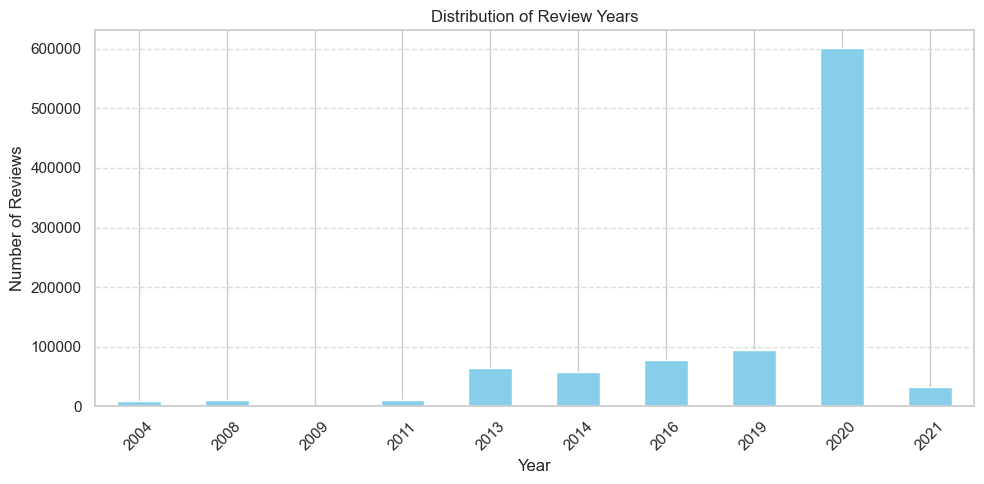

In [736]:
year_counts.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Distribution of Review Years")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Distribution of Movie year

In [743]:
df_cleaned['publish_year'] = df_cleaned['movie'].str.extract(r"\((\d{4})\)").astype('Int64')
movie_year_counts = df_cleaned['publish_year'].value_counts().sort_index()
print(movie_year_counts)


publish_year
1861         2
1874         1
1878         4
1883         1
1887         2
1888        10
1890         7
1891         7
1892         5
1893         2
1894        32
1895        34
1896        78
1897        46
1898        52
1899        44
1900        46
1901        44
1902        59
1903        68
1904        55
1905        50
1906        76
1907        60
1908        71
1909        50
1910        66
1911        70
1912       139
1913       111
1914        82
1915       133
1916       108
1917        75
1918        46
1919        86
1920       143
1921       163
1922       161
1923       137
1924       190
1925       220
1926       200
1927       319
1928       331
1929       380
1930       506
1931       866
1932       930
1933       887
1934       816
1935       876
1936      1019
1937       910
1938       814
1939      1223
1940      1281
1941      1171
1942      1180
1943       884
1944      1014
1945       974
1946      1169
1947      1014
1948      1243
1949      11

/var/folders/x6/dbkrtxl50n57204wss8d8p5r0000gn/T/ipykernel_42264/156510408.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_years["publish_year"] = df_years["publish_year"].astype(int)


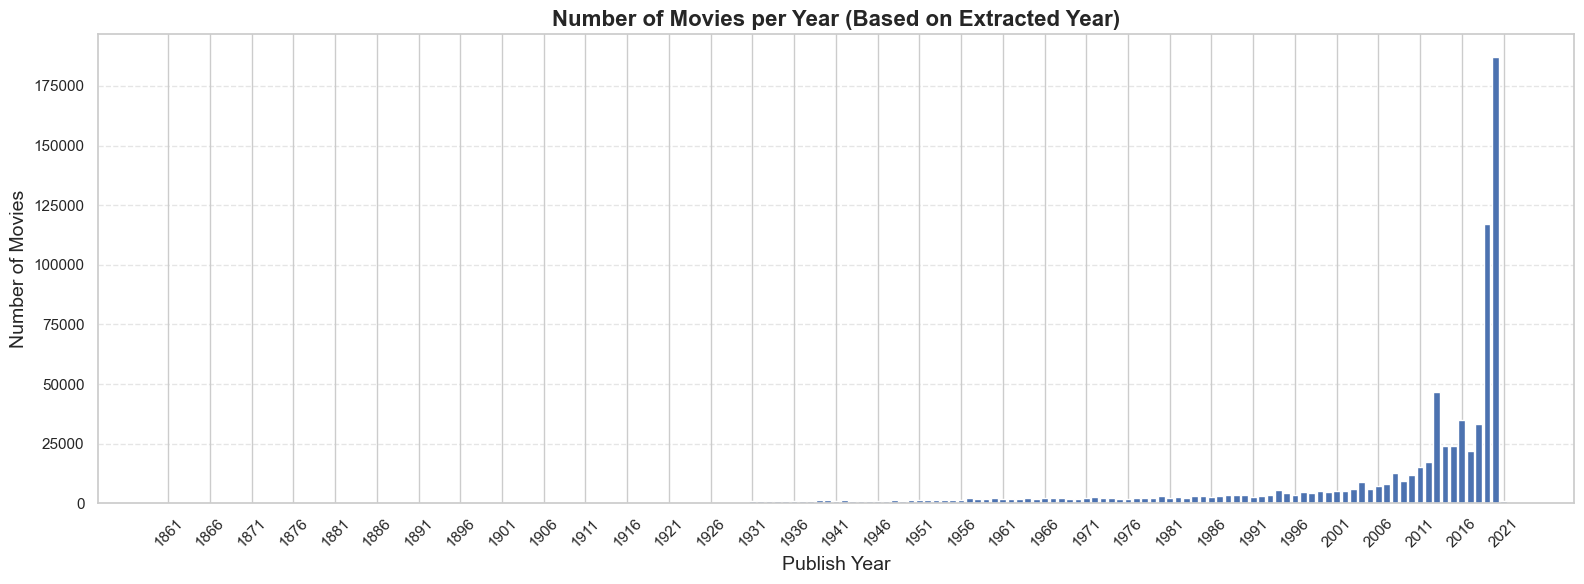

In [751]:
def extract_year(title):
    match = re.search(r"\((\d{4})\)", title)
    if match:
        return int(match.group(1))
    return None

df_cleaned["publish_year"] = df_cleaned["movie"].apply(extract_year)

df_years = df_cleaned.dropna(subset=["publish_year"])
df_years["publish_year"] = df_years["publish_year"].astype(int)

year_counts = df_years["publish_year"].value_counts().sort_index()

plt.figure(figsize=(16, 6))
plt.bar(year_counts.index, year_counts.values, color="#4C72B0")

plt.xticks(
    ticks=range(min(year_counts.index), max(year_counts.index)+1, 5),
    rotation=45
)
plt.title("Number of Movies per Year (Based on Extracted Year)", fontsize=16, weight='bold')
plt.xlabel("Publish Year", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


## Get Weekly Box office

### Dataset description

In [158]:
# Get the movie name
movie_set = set(df_cleaned['movie'].dropna().unique())

# Sort alphabetically
movie_list_sorted = sorted(movie_set)

print(f"A total of {len(movie_list_sorted)} movies were extracted")
print(movie_list_sorted[:120]) 


A total of 150429 movies were extracted
['"Flip Flop Flippin\': One man\'s search for character(s) on the A.T." (2014)', '"Lost Treasures of Egypt" (2019–2020)', '#1 Cheerleader Camp (2010 Video)', '#Alive (2020)', '#AnneFrank - Parallel Stories (2019)', '#Anniversary (2020)', '#BlackAF (2020– )', '#BlackLove (2015–2016)', '#Female Pleasure (2018)', '#FollowFriday (2016 TV Movie)', '#Followme (2019)', '#Freerayshawn (2020)', '#FriendButMarried 2 (2020)', '#HandoZenryoku (2020)', '#Horror (2015)', '#Horror: Beware Internet (2018)', '#Iamhere (2019)', '#JOVANNAFORFUTURE (2019)', '#Jowable (2019)', '#Lucky Number (2015)', '#Luimelia (2020– )', '#NoFilter (2013)', '#Nudes (2020)', '#Realityhigh (2017)', '#Rucker50 (2016)', '#Screamers (2016)', '#Stuck (2014)', '#ToDream (2019)', '#WalkAway Compilation - Part 1 (2018 Video)', '#WalkAway Compilation - Part 2 (2018 Video)', '#Washed (2018– )', '#Yaaram (2019)', '#babynymph (2016)', '#cats_the_mewvie (2020)', '#killerpost (2016– )', '$ (1971)'

### Get the Real Movies:

In many cases, TV series episodes or seasons share the same base title (e.g., *"American Experience"* or *"Planet Earth"*), and each episode may be listed separately with different subtitles or episode numbers. These duplicate entries artificially inflate the number of unique movies in the dataset and can introduce bias in sentiment or box office analysis if treated the same as standalone films.

To ensure that the final list contains only unique, clean, and theatrical movie titles, we apply a series of filtering steps. This cleaning is crucial for accurate downstream tasks such as matching with box office data, performing sentiment analysis, or analyzing release trends.

**These steps include:**
- **Removing duplicates** to eliminate multi-episode series listed under the same title, since repeated appearances typically indicate the title belongs to a TV series.
- **Filtering out non-theatrical content** by excluding titles that contain keywords such as *"TV"*, *"Video"*, *"Season"*, or *"Episode"*, which are commonly used to label TV shows, direct-to-video content, or episodes.
- **Keeping only titles with valid release years**, specifically those with a four-digit year.

The result is a high-quality list of real movie titles suitable for rigorous data analysis.


In [250]:
import re

# Step 1: Remove duplicated titles
unique_titles = pd.Series(movie_list_sorted)
unique_titles = unique_titles[~unique_titles.duplicated(keep=False)].tolist()

# Step 2: Define what qualifies as a movie
def is_movie_title(title):
    """
    Determine whether the title is a movie (not a TV series, video, episode, etc.)
    """
    match = re.search(r"\((\d{4})\)", title)
    is_clean = not re.search(r"(TV|Video|Season|Episode|Making|Behind|Featurette|Deleted Scenes|Up Close|Capturing|Crafting|Building|Miniature|Interview|Bonus|Part)", title, flags=re.IGNORECASE)
    return bool(match and is_clean)

# Step 3: Keep only the valid movies
movie_titles_only = [title for title in unique_titles if is_movie_title(title)]

print(movie_titles_only[:610]) 


['"Flip Flop Flippin\': One man\'s search for character(s) on the A.T." (2014)', '#Alive (2020)', '#AnneFrank - Parallel Stories (2019)', '#Anniversary (2020)', '#Female Pleasure (2018)', '#Followme (2019)', '#Freerayshawn (2020)', '#FriendButMarried 2 (2020)', '#HandoZenryoku (2020)', '#Horror (2015)', '#Horror: Beware Internet (2018)', '#Iamhere (2019)', '#JOVANNAFORFUTURE (2019)', '#Jowable (2019)', '#Lucky Number (2015)', '#NoFilter (2013)', '#Nudes (2020)', '#Realityhigh (2017)', '#Rucker50 (2016)', '#Screamers (2016)', '#Stuck (2014)', '#ToDream (2019)', '#Yaaram (2019)', '#babynymph (2016)', '#cats_the_mewvie (2020)', '$ (1971)', '$10 Raise (1935)', '$100,000 for a Killing (1967)', '$30 (1999)', '$5 a Day (2008)', '$50K and a Call Girl: A Love Story (2014)', '$9.99 (2008)', '$TACK$ (2020)', '$elfie Shootout (2016)', '$ellebrity (2012)', "'49-'17 (1917)", "'51 Dons (2014)", "'71 (2014)", "'Bama Girl (2008)", "'Breaker' Morant (1980)", "'C'-Man (1949)", "'Campeón del barrio' (Su ú

### Get rid of those unneccessary punctuation

In [221]:
import re

def clean_years_only(title):
    """
    Clean only the year portion (inside parentheses) and remove specific punctuation marks (., #, ‘).
    Keep the rest of the title structure and punctuation as-is.
    """
    # Remove the unwanted characters
    for char in [".", "#", "‘"]:
        title = title.replace(char, "")

    # Split out and clean the year part
    parts = re.split(r'(\(.*?\))', title)
    cleaned_parts = []

    for part in parts:
        if part.startswith('(') and part.endswith(')'):
            inner = part[1:-1]
            inner_clean = re.sub(r'[^\d]', '', inner)
            if len(inner_clean) == 4:
                cleaned_parts.append(f"({inner_clean})")
            else:
                continue
        else:
            cleaned_parts.append(part)

    return "".join(cleaned_parts).strip()

movie_titles_only_cleaned = [
    clean_years_only(title)
    for title in movie_titles_only
]

# Preview
for t in movie_titles_only_cleaned[:300]:
    print(t)


"Flip Flop Flippin': One man's search for character on the AT" (2014)
Alive (2020)
AnneFrank - Parallel Stories (2019)
Anniversary (2020)
Female Pleasure (2018)
Followme (2019)
Freerayshawn (2020)
FriendButMarried 2 (2020)
HandoZenryoku (2020)
Horror (2015)
Horror: Beware Internet (2018)
Iamhere (2019)
JOVANNAFORFUTURE (2019)
Jowable (2019)
Lucky Number (2015)
NoFilter (2013)
Nudes (2020)
Realityhigh (2017)
Rucker50 (2016)
Screamers (2016)
Stuck (2014)
ToDream (2019)
Yaaram (2019)
babynymph (2016)
cats_the_mewvie (2020)
$ (1971)
$10 Raise (1935)
$100,000 for a Killing (1967)
$30 (1999)
$5 a Day (2008)
$50K and a Call Girl: A Love Story (2014)
$999 (2008)
$TACK$ (2020)
$elfie Shootout (2016)
$ellebrity (2012)
'49-'17 (1917)
'51 Dons (2014)
'71 (2014)
'Bama Girl (2008)
'Breaker' Morant (1980)
'C'-Man (1949)
'Campeón del barrio'  (1964)
'Crocodile' Dundee II (1988)
'Doc' (1971)
'G' Men (1935)
'Gung Ho!': The Story of Carlson's Makin Island Raiders (1943)
'Neath Brooklyn Bridge (1942)
'Nea

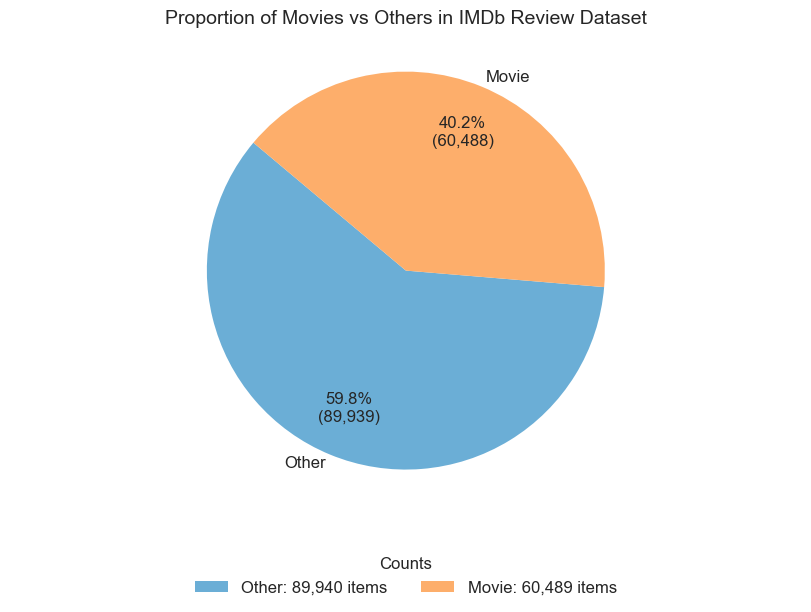

In [225]:

labels = ["Movie" if t in movie_titles_only else "Other" for t in movie_list_cleaned]
df_classified = pd.DataFrame({"title": movie_list_cleaned, "type": labels})
type_counts = df_classified["type"].value_counts()
total = type_counts.sum()

# --- plotting ---
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)

# draw the pie, pushing labels & pct‐texts a bit outward
wedges, texts, autotexts = ax.pie(
    type_counts,
    labels=type_counts.index,
    startangle=140,
    colors = ["#6BAED6", "#FDAE6B"],
    autopct=lambda p: f"{p:.1f}%\n({int(p*total/100):,})",
    pctdistance=0.75,
    labeldistance=1.05,
    textprops={'fontsize': 12},
    wedgeprops={'linewidth': 0}            # no edge lines
)

ax.set_title("Proportion of Movies vs Others in IMDb Review Dataset", fontsize=14, pad=20)
ax.axis("equal")  # keep it a circle

# move legend below the pie, centered
ax.legend(
    [w for w in wedges],
    [f"{k}: {v:,} items" for k, v in type_counts.items()],
    title="Counts",
    title_fontsize=12,
    fontsize=12,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.12),
    ncol=2,
    frameon=False
)

plt.show()


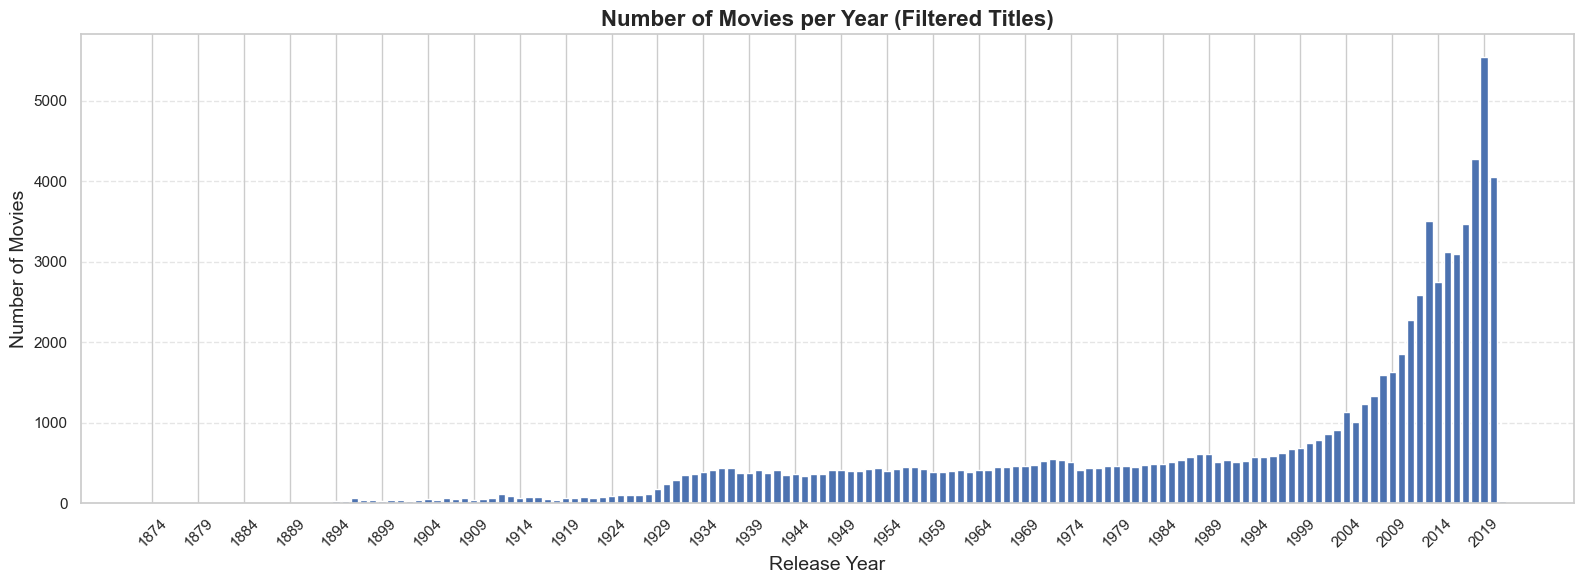

In [259]:

# Extraction Year
def extract_year(title):
    match = re.search(r"\((\d{4})\)", title)
    if match:
        return int(match.group(1))
    return None

years = [extract_year(title) for title in movie_titles_only]
df_years = pd.DataFrame(years, columns=["year"])
df_years = df_years.dropna()
df_years["year"] = df_years["year"].astype(int)

# Statistics by year
year_counts = df_years["year"].value_counts().sort_index()

# Plot
plt.figure(figsize=(16, 6))
plt.bar(year_counts.index, year_counts.values, color="#4C72B0")  # Removed edgecolor

# Ticks, title, labels
plt.xticks(ticks=range(min(year_counts.), max(year_counts.index), 5), rotation=45)
plt.title("Number of Movies per Year (Filtered Titles)", fontsize=16, weight='bold')
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Layout
plt.tight_layout()
plt.show()


In [255]:
df_year_counts = year_counts.reset_index()
df_year_counts.columns = ["Year", "Movie Count"]

df_year_counts = df_year_counts.sort_values("Year")

print(df_year_counts.to_string(index=False))  


 Year  Movie Count
 1874            1
 1878            2
 1883            1
 1887            2
 1888            3
 1890            3
 1891            3
 1892            3
 1893            1
 1894           26
 1895           27
 1896           65
 1897           39
 1898           36
 1899           33
 1900           37
 1901           41
 1902           30
 1903           47
 1904           48
 1905           40
 1906           64
 1907           54
 1908           67
 1909           43
 1910           51
 1911           64
 1912          121
 1913           96
 1914           67
 1915           79
 1916           77
 1917           58
 1918           37
 1919           63
 1920           62
 1921           79
 1922           70
 1923           81
 1924           90
 1925          105
 1926          106
 1927          107
 1928          121
 1929          183
 1930          236
 1931          293
 1932          352
 1933          364
 1934          389
 1935          416
 1936       

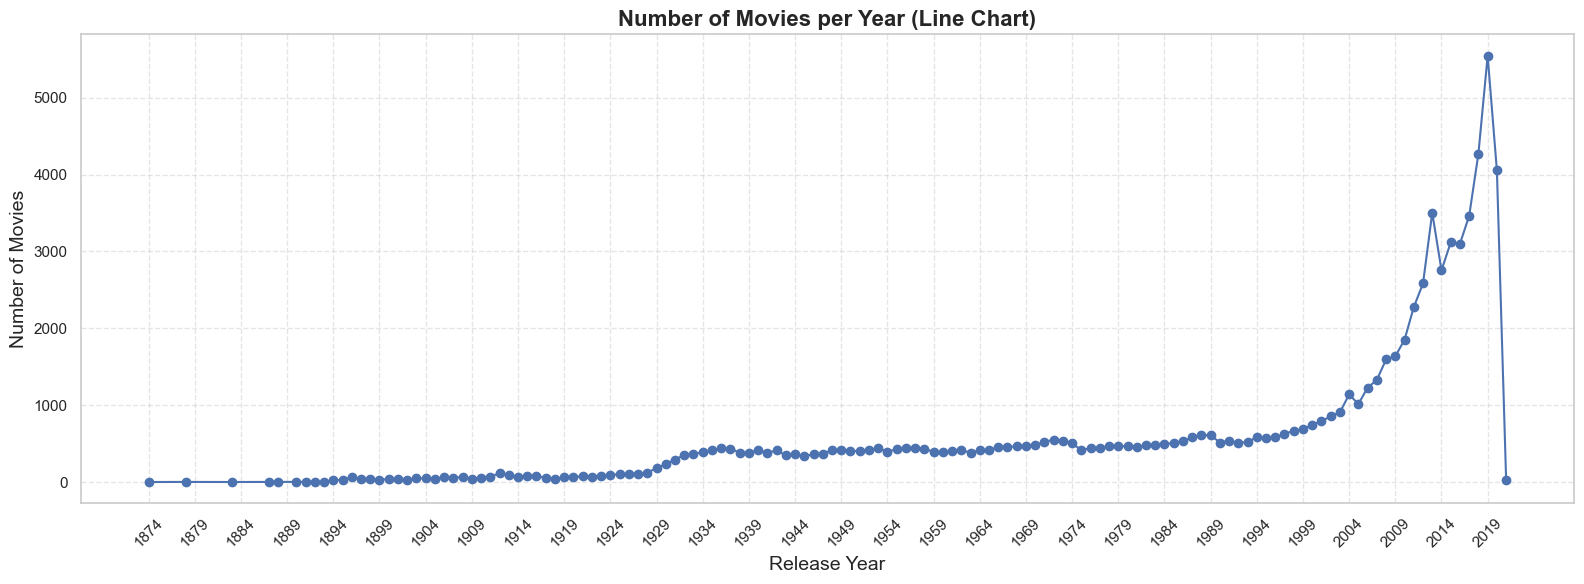

In [257]:
# Line chart
plt.figure(figsize=(16, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-', color="#4C72B0")

plt.title("Number of Movies per Year (Line Chart)", fontsize=16, weight='bold')
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)

plt.xticks(ticks=range(min(year_counts.index), max(year_counts.index)+1, 5), rotation=45)

plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Decide the range of useful data
As the number of published movies showed a really significant upwoards trend between 2010 to 2020, here I choose this range for my analysis of the relationship between sentiment analysis and box office. The number of movie would be 1000.

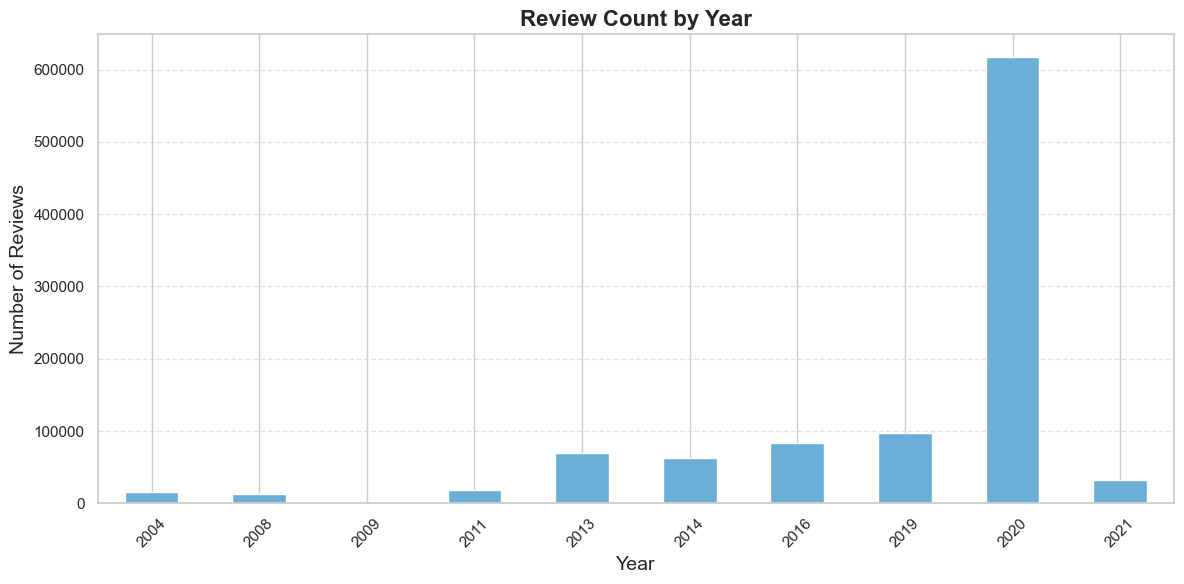

In [327]:
# Load the flattened_reviews DataFrame (assuming it's already loaded in your environment)
# Display review_date distribution by year
review_date_distribution = flattened_reviews['review_date'].dropna()

# Convert to datetime if not already
review_date_distribution = pd.to_datetime(review_date_distribution, errors='coerce')
review_date_distribution = review_date_distribution.dropna()

# Group by year and count
review_year_counts = review_date_distribution.dt.year.value_counts().sort_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
review_year_counts.plot(kind='bar', color="#6BAED6")
plt.title("Review Count by Year", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Reviews", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Get the list of movie name**

In [339]:
# Filter movies from 2010 to 2020
df_selected = df_movies[df_movies["year"] == 2020].copy()

# Optionally sample a subset if needed
df_sampled = df_selected.sample(n=1000, random_state=42)

print(f"Selected {len(df_sampled)} movies 2020")


Selected 1000 movies 2020


### Sample Clean Movie Set for Analysis:

To ensure the quality and relevance of the movies used for sentiment or box office analysis, we apply a targeted filtering process to a cleaned pool of movie titles. While the initial dataset may contain thousands of valid titles, not all are suitable for meaningful study—some may fall outside the desired time range, lack sufficient viewer feedback, or be in non-English languages that complicate sentiment modeling.

This refined selection step helps ensure that the sample is recent, data-rich, and appropriate for consistent analysis.

**These steps include:**
- **Sampling up to 1000 movies released at 2020**, which balances temporal relevance with computational efficiency.
- **Filtering by review count**, keeping only those movies with at least 30 reviews to ensure sufficient viewer feedback for sentiment analysis.
- **Removing non-English titles** by excluding movies with Chinese characters in their names, helping maintain consistency in language-based NLP tasks.

The result is a focused dataset of high-signal, English-language films, ideal for downstream modeling and evaluation.

In [333]:

# Step 1: Extract release year from each title
def extract_year(title):
    match = re.search(r"\((\d{4})\)", title)
    if match:
        return int(match.group(1))
    return None

# Create DataFrame and extract year
df_movies = pd.DataFrame({'movie': movie_titles_only_cleaned})
df_movies['year'] = df_movies['movie'].apply(extract_year)

# Step 2: Select movies released only 2020 (up to 1000)
df_range = df_movies[df_movies['year'] == 2020].copy()
df_sampled = df_range.sample(n=min(3000, len(df_range)), random_state=42)

# Step 3: Count number of reviews per movie from df_cleaned
review_counts = df_cleaned.groupby("movie")["review_detail"].count().reset_index()
review_counts.columns = ["movie", "review_count"]

df_sampled = df_sampled.merge(review_counts, on="movie", how="left") # Merge actual review counts into df_sampled

df_sampled["review_count"] = df_sampled["review_count"].fillna(0).astype(int) # Fill any missing counts with 0 (in case a sampled movie had no matched reviews)

# Step 4: Remove movies with fewer than 30 reviews
df_filtered = df_sampled[df_sampled['review_count'] >= 30].copy()

# Step 5: Remove movies with Chinese characters in their titles
def contains_chinese(text):
    return bool(re.search(r'[\u4e00-\u9fff]', text))

df_filtered = df_filtered[~df_filtered['movie'].apply(contains_chinese)].copy()

# Final result
df_filtered = df_filtered.sort_values(by="review_count", ascending=False).reset_index(drop=True)# sort by review count descending
print(f"Final movie count: {len(df_filtered)}")
display(df_filtered.head())


Final movie count: 407


,movie,year,review_count
0,Dil Bechara (2020),2020,7604
1,Gunjan Saxena: The Kargil Girl (2020),2020,4328
2,The Haunting of Bly Manor (2020),2020,2015
3,The Old Guard (2020),2020,1564
4,Soorarai Pottru (2020),2020,1504


In [337]:
print(df_filtered）

                                                 movie  year  review_count
0                                   Dil Bechara (2020)  2020          7604
1                Gunjan Saxena: The Kargil Girl (2020)  2020          4328
2                     The Haunting of Bly Manor (2020)  2020          2015
3                                 The Old Guard (2020)  2020          1564
4                               Soorarai Pottru (2020)  2020          1504
5                                  Enola Holmes (2020)  2020          1422
6                                          Soul (2020)  2020          1385
7                                          Away (2020)  2020          1370
8                                          Ludo (2020)  2020          1112
9                 I'm Thinking of Ending Things (2020)  2020           977
10                                Birds of Prey (2020)  2020           922
11                       The Devil All the Time (2020)  2020           878
12                       

In [362]:
df_filtered.to_excel("filtered_movies.xlsx", index=False)

### Matching the release_coutry

**Method 1: by wiki**

In [366]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time

nm = pd.read_excel("/Users/hotpotato/Desktop/Final Project/filtered_movies.xlsx")
movies = nm["movie"].tolist()

# Unify the film titles and remove the year
def clean_title(title):
    return re.sub(r"\s*\(\d{4}\)", "", title).strip()

# Grab the Country field in the infobox
def extract_country(td):
    for sup in td.find_all("sup"):
        sup.decompose()  
    if td.find_all("a"):
        return ", ".join([a.get_text(strip=True) for a in td.find_all("a")])
    else:
        return td.get_text(separator=", ").strip()

# Use possible formats to get Wikipedia page
def get_country(movie_title):
    base = movie_title.replace(" ", "_")
    candidates = [
        f"https://en.wikipedia.org/wiki/{base}_(2020_film)",
        f"https://en.wikipedia.org/wiki/{base}_(film)",
        f"https://en.wikipedia.org/wiki/{base}"
    ]

    for url in candidates:
        try:
            res = requests.get(url, timeout=10)
            if res.status_code != 200:
                continue

            soup = BeautifulSoup(res.content, "html.parser")
            infobox = soup.find("table", class_=lambda x: x and "infobox" in x)
            if infobox:
                for row in infobox.find_all("tr"):
                    if row.th and any(k in row.th.text for k in ["Country", "Countries", "Country of origin"]):
                        country = extract_country(row.td)
                        return country, url
        except Exception as e:
            print(f"Error for {url}: {e}")
            continue

    return "Not Found", "No Valid Link"

# Execute the main logic
results = []
for m in movies:
    clean = clean_title(m)
    country, link = get_country(clean)
    print(f"{m} → {country} ({link})")
    results.append({"movie": m, "country": country, "source_link": link})
    time.sleep(1.5)  

# Transform into DataFrame
df = pd.DataFrame(results)
df.to_csv("wiki_movie_country_final.csv", index=False)


Dil Bechara (2020) → India (https://en.wikipedia.org/wiki/Dil_Bechara)
Gunjan Saxena: The Kargil Girl (2020) → India (https://en.wikipedia.org/wiki/Gunjan_Saxena:_The_Kargil_Girl)
The Haunting of Bly Manor (2020) → United States (https://en.wikipedia.org/wiki/The_Haunting_of_Bly_Manor)
The Old Guard (2020) → United States (https://en.wikipedia.org/wiki/The_Old_Guard_(2020_film))
Soorarai Pottru (2020) → India (https://en.wikipedia.org/wiki/Soorarai_Pottru)
Enola Holmes (2020) → , United Kingdom, 
, United States, (https://en.wikipedia.org/wiki/Enola_Holmes_(film))
Soul (2020) → United States (https://en.wikipedia.org/wiki/Soul_(2020_film))
Away (2020) → Not Found (No Valid Link)
Ludo (2020) → India (https://en.wikipedia.org/wiki/Ludo_(film))
I'm Thinking of Ending Things (2020) → United States (https://en.wikipedia.org/wiki/I'm_Thinking_of_Ending_Things_(film))
Birds of Prey (2020) → [1] (https://en.wikipedia.org/wiki/Birds_of_Prey_(2020_film))
The Devil All the Time (2020) → United St

**Method2: by IMDb**

In [373]:
pip install fuzzywuzzy python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.4/156.4 kB 1.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [375]:
import pandas as pd
import re
from fuzzywuzzy import process, fuzz


# Step 1: Read filtered movie list

df_filtered = pd.read_excel("/Users/hotpotato/Desktop/Final Project/code_output/filtered_movies.xlsx")
target_years = set(df_filtered["year"].astype(int).tolist())

# Step 2: Read the IMDb raw data in chunks, keeping only the movies and years you need

imdb_cols = ["tconst", "titleType", "primaryTitle", "startYear"]
reader = pd.read_csv( 
"/Users/hotpotato/Desktop/Final Project/Dataset/title.basics.tsv.gz", 
sep="\t", 
dtype=str, 
usecols=imdb_cols, chunksize=200000
)

chunks = []
for chunk in reader: 
mask = (chunk["titleType"] == "movie") & (chunk["startYear"].isin(map(str, target_years))) 
filtered = chunk.loc[mask, ["tconst", "primaryTitle", "startYear"]] 
chunks.append(filtered)
df_titles = pd.concat(chunks, ignore_index=True)
df_titles["startYear"] = df_titles["startYear"].astype(int)

# Step 3: Build a fast index grouped by year

year_to_titles = {}
year_to_id = {}
for year, grp in df_titles.groupby("startYear"): 
titles = grp["primaryTitle"].tolist() 
year_to_titles[year] = titles year_to_id[year] = dict(zip(grp["primaryTitle"], grp["tconst"]))

# Step 4: Clean up movie names (remove the year in brackets)

def clean_title(title):
return re.sub(r"\s*\(\d{4}\)", "", title).strip()

df_filtered["clean_movie"] = df_filtered["movie"].apply(clean_title)

# Step 5: Matching function, first precise then fuzzy (using fuzzywuzzy)

def match_imdb(row):
title = row["clean_movie"]
year = int(row["year"])
candidates = year_to_titles.get(year, [])
# Do case-insensitive exact match first
for cand in candidates:
if cand.lower() == title.lower(): 
imdb_id = year_to_id[year][cand] 
return imdb_id, f"https://www.imdb.com/title/{imdb_id}/" 

# Do fuzzy matching again 
best = process.extractOne( 
title, 
candidates, 
scorer=fuzz.WRatio, 
score_cutoff=90 
) 
if best: 
matched = best[0] 
imdb_id = year_to_id[year][matched] 
return imdb_id, f"https://www.imdb.com/title/{imdb_id}/" 
return "Not found", "N/A"

# -----------------------
# Step 6: Apply in batches and export
# -----------------------
df_filtered[["imdb_id", "imdb_link"]] = df_filtered.apply( 
match_imdb, axis=1, result_type="expand"
)

df_filtered.to_excel( "/Users/hotpotato/Desktop/Final Project/code_output/filtered_movies_with_imdb_links_fast.xlsx", 
index=False
)
print("Done in: filtered_movies_with_imdb_links_fast.xlsx")

✅ 完成！请查看 filtered_movies_with_imdb_links_fast.xlsx


In [377]:
pip install pandas openpyxl requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [382]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

# —— Configuration ——
INPUT_XLSX = "filtered_movies_with_imdb_links_fast.xlsx" # with imdb_link
OUTPUT_XLSX = "filtered_movies_with_country_only.xlsx" # only with country
HEADERS = {"User-Agent": "Mozilla/5.0"}
SLEEP_SEC = 1.0

# —— Read and filter ——
df = pd.read_excel(INPUT_XLSX)
df = df[(df.imdb_id != "Not found") & (df.imdb_link != "N/A")].reset_index(drop=True)
df["country_of_origin"] = "" # Add a new column

# —— Extract Country Function --
def extract_country(imdb_url):
try:
resp = requests.get(imdb_url, headers=HEADERS, timeout=10)
resp.raise_for_status()
soup = BeautifulSoup(resp.content, "html.parser")

# Locate data-testid="title-details-origin"
li = soup.find("li", {"data-testid": "title-details-origin"})
if not li:
return "Not listed"

# Delete possible footnotes sup
for sup in li.find_all("sup"):
sup.decompose()

# Extract all text in <a> tags
links = li.select("div.ipc-metadata-list-item__content-container a")
if links:
return ", ".join(a.text.strip() for a in links)
else:
# If not <a>, then directly get the container text
div = li.find("div", class_="ipc-metadata-list-item__content-container")
return div.get_text(", ", strip=True) if div else "Not listed"
except:
return "Error"

# —— Loop to grab the country ——
for idx, row in df.iterrows():
country = extract_country(row["imdb_link"])
df.at[idx, "country_of_origin"] = country
print(f"[{idx+1}/{len(df)}] {row['movie']} → {country}")
time.sleep(SLEEP_SEC)

# —— Save the result ——
df.to_excel(OUTPUT_XLSX, index=False)
print("Done in:", OUTPUT_XLSX)

[1/381] Dil Bechara (2020) → India
[2/381] Gunjan Saxena: The Kargil Girl (2020) → India
[3/381] The Haunting of Bly Manor (2020) → United States
[4/381] The Old Guard (2020) → United States, France, Iceland, United Kingdom, Morocco, Canada
[5/381] Soorarai Pottru (2020) → India
[6/381] Enola Holmes (2020) → United States
[7/381] Soul (2020) → United States
[8/381] Away (2020) → Portugal
[9/381] Ludo (2020) → India
[10/381] I'm Thinking of Ending Things (2020) → United States
[11/381] Birds of Prey (2020) → Bangladesh
[12/381] The Devil All the Time (2020) → United States
[13/381] The New Mutants (2020) → United States
[14/381] The Witches (2020) → United States, Mexico, Canada
[15/381] Greenland (2020) → United States, United Kingdom
[16/381] Greyhound (2020) → United States, Canada, China
[17/381] Torbaaz (2020) → India
[18/381] Khuda Haafiz (2020) → India
[19/381] Atkan Chatkan (2020) → India
[20/381] Taish (2020) → India
[21/381] Hillbilly Elegy (2020) → United States
[22/381] Bloo

In [620]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

# —— Configuration ——
INPUT_XLSX  = "/Users/hotpotato/Desktop/Final Project/code_output/filtered_movies_with_country_only.xlsx" 
SLEEP_SEC   = 1.0
HEADERS     = {"User-Agent": "Mozilla/5.0"}

# —— Reload the intermediate result ——
df = pd.read_excel(INPUT_XLSX)

# —— The same extract_country function ——
def extract_country(imdb_url):
    try:
        resp = requests.get(imdb_url, headers=HEADERS, timeout=10)
        resp.raise_for_status()
        soup = BeautifulSoup(resp.content, "html.parser")

        li = soup.find("li", {"data-testid": "title-details-origin"})
        if not li:
            return "Not listed"

        for sup in li.find_all("sup"):  # remove footnote markers
            sup.decompose()

        links = li.select("div.ipc-metadata-list-item__content-container a")
        if links:
            return ", ".join(a.text.strip() for a in links)
        else:
            div = li.find("div", class_="ipc-metadata-list-item__content-container")
            return div.get_text(", ", strip=True) if div else "Not listed"
    except:
        return "Error"

# —— Identify rows that previously errored —— 
error_mask = df["country_of_origin"] == "Error"
error_count = error_mask.sum()
print(f"Found {error_count} rows with 'Error' country; retrying those...")

# —— Retry extraction for those rows —— 
for idx in df[error_mask].index:
    imdb_link = df.at[idx, "imdb_link"]
    # Retry
    country = extract_country(imdb_link)
    df.at[idx, "country_of_origin"] = country
    print(f"  Retried [{idx}] {df.at[idx,'movie']} → {country}")
    time.sleep(SLEEP_SEC)

# —— Save updated results —— 
df.to_excel(INPUT_XLSX, index=False)
print(" Retried all errors and updated:", INPUT_XLSX)


Found 19 rows with 'Error' country; retrying those...
  Retried [334] Reaptown (2020) → United States
  Retried [335] Broil (2020) → United States
  Retried [336] The Opening Act (2020) → United States
  Retried [337] Rose Island (2020) → Italy
  Retried [338] Lost Heart (2020) → United States
  Retried [339] Totally Under Control (2020) → United States
  Retried [340] Gully Gang (2020) → South Korea
  Retried [341] The Murders at White House Farm (2020) → India
  Retried [342] The Porter: The Untold Story at Everest (2020) → United States
  Retried [343] The Mentor (2020) → United States
  Retried [344] Deadwater Fell (2020) → New Zealand
  Retried [345] The Sounds (2020) → United States
  Retried [355] Shikara (2020) → India
  Retried [356] Echo Boomers (2020) → United States
  Retried [357] Halahal (2020) → India
  Retried [358] Wheels of Fortune (2020) → United States
  Retried [359] Jasper Mall (2020) → United States
  Retried [365] Legacy of Lies (2020) → Netherlands, United King

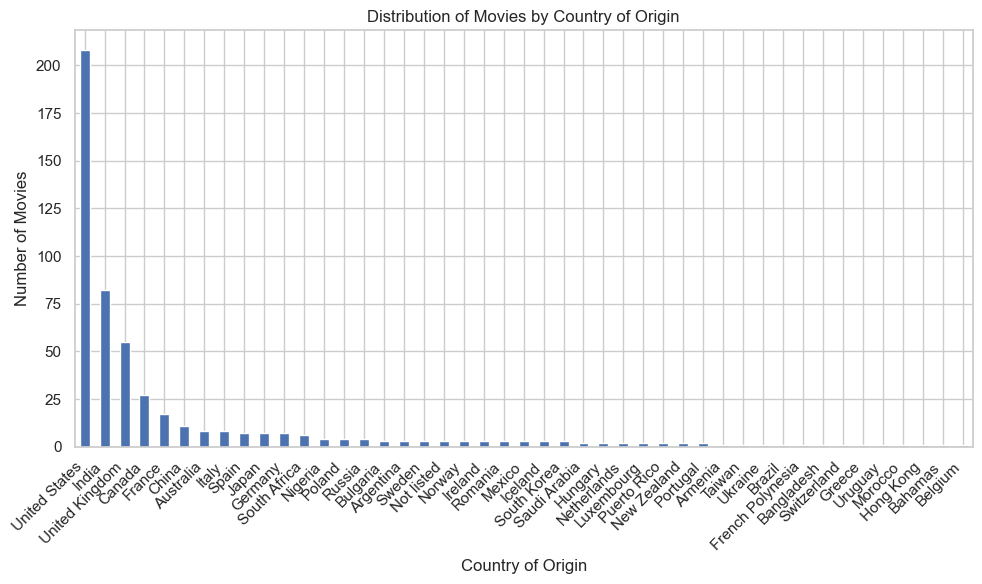

In [622]:
df = pd.read_excel("/Users/hotpotato/Desktop/Final Project/code_output/filtered_movies_with_country_only.xlsx")

# 拆分多国情况，把每部电影可能的多个国家都单独计数
countries_series = (
    df['country_of_origin']
      .dropna()
      .apply(lambda s: [c.strip() for c in s.split(',')])
)

# 展平列表并计数
all_countries = [c for sublist in countries_series for c in sublist]
country_counts = pd.Series(all_countries).value_counts()

# 绘图
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.xlabel('Country of Origin')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Country of Origin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


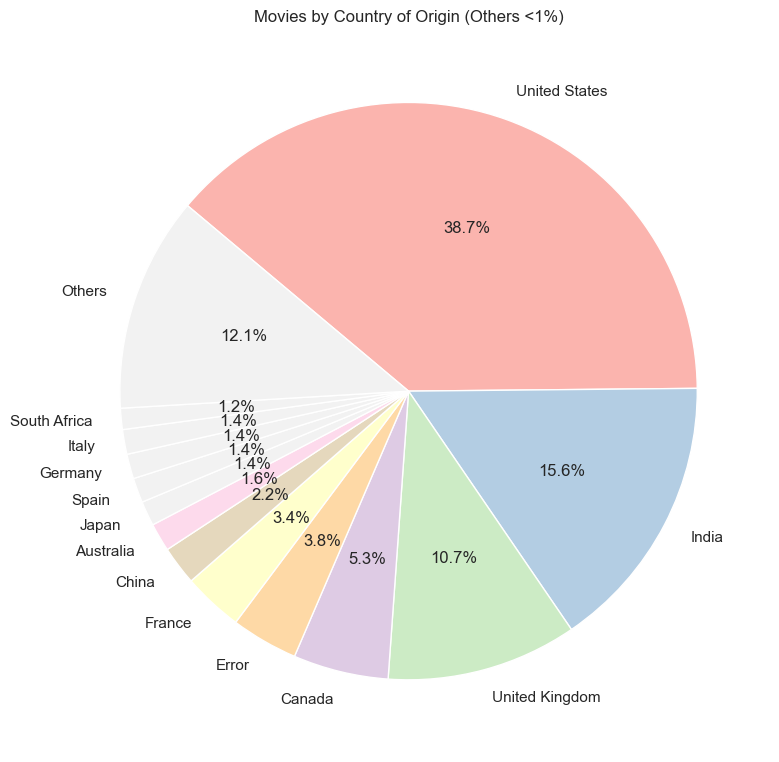

In [388]:
df = pd.read_excel("filtered_movies_with_country_only.xlsx")

# Split multiple countries and count each possible country for each movie
countries_series = (
df['country_of_origin']
.dropna()
.apply(lambda s: [c.strip() for c in s.split(',')])
)

# Flatten the list and count
all_countries = [c for sublist in countries_series for c in sublist]
country_counts = pd.Series(all_countries).value_counts()

# Calculate percentages and classify <1% as "Others"
total = country_counts.sum()
pct = country_counts / total * 100
large = country_counts[pct >= 1]
small_sum = country_counts[pct < 1].sum()
new_counts = large.copy()
if small_sum > 0:
new_counts['Others'] = small_sum

# Draw a pie chart using the desaturated Pastel1 palette
plt.figure(figsize=(8, 8))
cmap = plt.get_cmap('Pastel1')
colors = cmap(range(len(new_counts)))
new_counts.plot(
kind='pie',
autopct='%1.1f%%',
startangle=140,
counterclock=False,
colors=colors
)
plt.ylabel('')
plt.title('Movies by Country of Origin (Others <1%)')
plt.tight_layout()
plt.show()

In [624]:

# Load the Excel file with country information
df = pd.read_excel("/Users/hotpotato/Desktop/Final Project/code_output/filtered_movies_with_country_only.xlsx")

# Filter rows where Country of origin contains 'United States'
df_us = df[df["country_of_origin"].str.contains("United States", case=False, na=False)].reset_index(drop=True)

# Save the filtered results to a new Excel file
output_path = "/Users/hotpotato/Desktop/Final Project/code_output/filtered_movies_us_only.xlsx"
df_us.to_excel(output_path, index=False)

output_path



'/Users/hotpotato/Desktop/Final Project/code_output/filtered_movies_us_only.xlsx'

### Step 2: choose movies only publish in America

Since IMDb is the largest film platform in the United States, it provides the most relevant data for analyzing the domestic box office. Therefore, this study focuses exclusively on movies released in the U.S.

In [630]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

# Configuration
INPUT_XLSX = "/Users/hotpotato/Desktop/Final Project/code_output/filtered_movies_us_only.xlsx"
OUTPUT_XLSX = "/Users/hotpotato/Desktop/Final Project/code_output/filtered_movies_us_with_release.xlsx"
HEADERS = {"User-Agent": "Mozilla/5.0"}
SLEEP_SEC = 1.5

# Read US-only movie list
df = pd.read_excel(INPUT_XLSX)
df["release_date"] = ""  # Add new column

def extract_release_date(imdb_url):
    """
    Extract only the Release date from the IMDb page (using the data-testid tag)
    """
    try:
        resp = requests.get(imdb_url, headers=HEADERS, timeout=10)
        resp.raise_for_status()
        soup = BeautifulSoup(resp.content, "html.parser")

        rd_li = soup.find("li", {"data-testid": "title-details-releasedate"})
        if not rd_li:
            return "Not listed"

        first_li = rd_li.select_one(
            "div.ipc-metadata-list-item__content-container ul li"
        )
        if not first_li:
            return "Not listed"

        a_tag = first_li.find("a")
        return a_tag.text.strip() if a_tag else first_li.get_text(strip=True)
    except Exception:
        return "Error"

# Loop to capture the Release date of all US movies
for idx, row in df.iterrows():
    imdb_link = row.get("imdb_link", "")
    if imdb_link and imdb_link != "N/A":
        df.at[idx, "release_date"] = extract_release_date(imdb_link)
        print(f"[{idx+1}/{len(df)}] {row['movie']} → {df.at[idx, 'release_date']}")
    else:
        df.at[idx, "release_date"] = "No link"
    time.sleep(SLEEP_SEC)

# Save the new table with Release date
df.to_excel(OUTPUT_XLSX, index=False)
print(f"Saved to: {OUTPUT_XLSX}")


[1/208] The Haunting of Bly Manor (2020) → January 13, 2020 (United States)
[2/208] The Old Guard (2020) → July 10, 2020 (United States)
[3/208] Enola Holmes (2020) → September 23, 2020 (United States)
[4/208] Soul (2020) → November 29, 2020 (United States)
[5/208] I'm Thinking of Ending Things (2020) → September 4, 2020 (United States)
[6/208] The Devil All the Time (2020) → September 10, 2020 (United States)
[7/208] The New Mutants (2020) → August 28, 2020 (United States)
[8/208] The Witches (2020) → October 22, 2020 (United States)
[9/208] Greenland (2020) → May 8, 2021 (United States)
[10/208] Greyhound (2020) → July 10, 2020 (United States)
[11/208] Hillbilly Elegy (2020) → November 24, 2020 (United States)
[12/208] Bloodshot (2020) → March 13, 2020 (United States)
[13/208] Sacred Cow: The Nutritional, Environmental and Ethical Case for Better Meat (2020) → September 28, 2020 (United States)
[14/208] Scoob! (2020) → May 15, 2020 (United States)
[15/208] The Wrong Missy (2020) → Ma

### Get the weekly box ofiice

Get weekly box office from the number via crawler

In [637]:
import re
import time
import random
import requests
import pandas as pd
from bs4 import BeautifulSoup
from io import StringIO
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

# ── Configuration ─────────────────────────────────────
INPUT_XLSX  = "/Users/hotpotato/Desktop/Final Project/code_output/filtered_movies_us_with_release.xlsx"
OUTPUT_CSV  = "/Users/hotpotato/Desktop/Final Project/code_output/ "
FAILED_CSV  = "/Users/hotpotato/Desktop/Final Project/code_output/failed_movies.csv"
HEADERS     = {"User-Agent": "Mozilla/5.0"}
SLEEP_SEC   = (1, 3)  # Sleep random between 1-3 seconds
MAX_WEEKS   = 6

# ── Read movie list ────────────────────────────────────
df = pd.read_excel(INPUT_XLSX)
movies = df["movie"].dropna().astype(str).tolist()

# ── Prepare HTTP session with retry ─────────────────────
session = requests.Session()
session.headers.update(HEADERS)
retry_strategy = Retry(
    total=2,
    backoff_factor=0.3,
    status_forcelist=[429, 500, 502, 503, 504],
    allowed_methods=["GET"]
)
adapter = HTTPAdapter(max_retries=retry_strategy)
session.mount("https://", adapter)
session.mount("http://", adapter)

# ── Helper functions ───────────────────────────────────
def extract_year(title: str):
    m = re.search(r"\((\d{4})\)", title)
    return m.group(1) if m else None

def generate_slugs(title: str):
    year = extract_year(title)
    if not year:
        return
    base = re.sub(r"\s*\(\d{4}\)\s*$", "", title).strip()
    norm = re.sub(r"[^0-9A-Za-z -]", "", base)
    slug = norm.replace(" ", "-")
    yield f"{slug}-({year})"
    yield slug
    if base.lower().startswith("the "):
        rest = norm[4:].strip().replace(" ", "-")
        yield f"{rest}-The-({year})"

def fetch_weekly_box_office(slug: str):
    url = f"https://www.the-numbers.com/movie/{slug}#tab=box-office"
    resp = session.get(url, timeout=(3, 5))
    resp.raise_for_status()
    soup = BeautifulSoup(resp.text, "html.parser")

    table_tag = soup.find("table", id="box_office_weekly")
    if not table_tag:
        for df_tbl in pd.read_html(StringIO(resp.text)):
            if "Week" in df_tbl.columns:
                table_tag = df_tbl
                break
        else:
            return None

    if hasattr(table_tag, "get_text"):
        df_tbl = pd.read_html(StringIO(str(table_tag)))[0]
    else:
        df_tbl = table_tag

    return df_tbl.iloc[:MAX_WEEKS].reset_index(drop=True)

# ── Main crawl loop ────────────────────────────────────
no_slug = []
fetch_fail = []
all_results = []

for idx, title in enumerate(movies, 1):
    year = extract_year(title)
    if not year:
        no_slug.append(title)
        print(f"[{idx}/{len(movies)}] {title} → ❗ No year found, skipped")
        continue

    df_weeks = None
    used_slug = None

    for slug in generate_slugs(title):
        print(f"[{idx}/{len(movies)}] Trying slug: {slug} for movie: {title}")
        try:
            df_weeks = fetch_weekly_box_office(slug)
            if isinstance(df_weeks, pd.DataFrame):
                used_slug = slug
                break
        except Exception as e:
            print(f"    ✖ Failed slug {slug}: {str(e)[:100]}")  # Only show first 100 chars
            df_weeks = None
        time.sleep(0.5)  # between slugs

    status = "no slug" if not used_slug else ("fetched" if df_weeks is not None else "failed")
    print(f"→ {title} | Status: {status} | Used slug: {used_slug}")

    if df_weeks is None:
        fetch_fail.append(title)
    else:
        df_weeks.insert(0, "Movie", title)
        df_weeks.insert(1, "Slug", used_slug)
        all_results.append(df_weeks)

    time.sleep(random.uniform(*SLEEP_SEC))  # between movies

# ── Reporting and Save ─────────────────────────────────
print(" Summary:")
print(f"- Movies without year: {len(no_slug)}")
print(f"- Movies failed fetching: {len(fetch_fail)}")
print(f"- Movies successfully fetched: {len(all_results)}")

if all_results:
    final_df = pd.concat(all_results, ignore_index=True)
    final_df.to_csv(OUTPUT_CSV, index=False)
    print(f" Saved box office data to: {OUTPUT_CSV}")
else:
    print("No box office data was fetched.")

if fetch_fail:
    pd.DataFrame({"Failed Movies": fetch_fail}).to_csv(FAILED_CSV, index=False)
    print(f" Saved failed movies list to: {FAILED_CSV}")


[1/208] Trying slug: The-Haunting-of-Bly-Manor-(2020) for movie: The Haunting of Bly Manor (2020)
    ✖ Failed slug The-Haunting-of-Bly-Manor-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[1/208] Trying slug: The-Haunting-of-Bly-Manor for movie: The Haunting of Bly Manor (2020)
    ✖ Failed slug The-Haunting-of-Bly-Manor: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[1/208] Trying slug: Haunting-of-Bly-Manor-The-(2020) for movie: The Haunting of Bly Manor (2020)


    ✖ Failed slug Haunting-of-Bly-Manor-The-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ The Haunting of Bly Manor (2020) | Status: no slug | Used slug: None
[2/208] Trying slug: The-Old-Guard-(2020) for movie: The Old Guard (2020)
    ✖ Failed slug The-Old-Guard-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[2/208] Trying slug: The-Old-Guard for movie: The Old Guard (2020)


    ✖ Failed slug The-Old-Guard: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[2/208] Trying slug: Old-Guard-The-(2020) for movie: The Old Guard (2020)


    ✖ Failed slug Old-Guard-The-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ The Old Guard (2020) | Status: no slug | Used slug: None
[3/208] Trying slug: Enola-Holmes-(2020) for movie: Enola Holmes (2020)
[3/208] Trying slug: Enola-Holmes for movie: Enola Holmes (2020)
→ Enola Holmes (2020) | Status: no slug | Used slug: None
[4/208] Trying slug: Soul-(2020) for movie: Soul (2020)
→ Soul (2020) | Status: fetched | Used slug: Soul-(2020)
[5/208] Trying slug: Im-Thinking-of-Ending-Things-(2020) for movie: I'm Thinking of Ending Things (2020)
[5/208] Trying slug: Im-Thinking-of-Ending-Things for movie: I'm Thinking of Ending Things (2020)
→ I'm Thinking of Ending Things (2020) | Status: no slug | Used slug: None
[6/208] Trying slug: The-Devil-All-the-Time-(2020) for movie: The Devil All the Time (2020)
[6/208] Trying slug: The-Devil-All-the-Time for movie: The Devil All the Time (2020)
[6/208] Trying slug: Devil-All-the-Time-The-(2020) for movie: T

→ The New Mutants (2020) | Status: fetched | Used slug: New-Mutants-The-(2020)
[8/208] Trying slug: The-Witches-(2020) for movie: The Witches (2020)
    ✖ Failed slug The-Witches-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[8/208] Trying slug: The-Witches for movie: The Witches (2020)
    ✖ Failed slug The-Witches: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[8/208] Trying slug: Witches-The-(2020) for movie: The Witches (2020)


→ The Witches (2020) | Status: no slug | Used slug: None
[9/208] Trying slug: Greenland-(2020) for movie: Greenland (2020)
[9/208] Trying slug: Greenland for movie: Greenland (2020)
→ Greenland (2020) | Status: no slug | Used slug: None
[10/208] Trying slug: Greyhound-(2020) for movie: Greyhound (2020)
[10/208] Trying slug: Greyhound for movie: Greyhound (2020)
→ Greyhound (2020) | Status: no slug | Used slug: None
[11/208] Trying slug: Hillbilly-Elegy-(2020) for movie: Hillbilly Elegy (2020)
[11/208] Trying slug: Hillbilly-Elegy for movie: Hillbilly Elegy (2020)
→ Hillbilly Elegy (2020) | Status: no slug | Used slug: None
[12/208] Trying slug: Bloodshot-(2020) for movie: Bloodshot (2020)
→ Bloodshot (2020) | Status: fetched | Used slug: Bloodshot-(2020)
[13/208] Trying slug: Sacred-Cow-The-Nutritional-Environmental-and-Ethical-Case-for-Better-Meat-(2020) for movie: Sacred Cow: The Nutritional, Environmental and Ethical Case for Better Meat (2020)
[13/208] Trying slug: Sacred-Cow-The-N

    ✖ Failed slug The-Wrong-Missy: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[15/208] Trying slug: Wrong-Missy-The-(2020) for movie: The Wrong Missy (2020)


→ The Wrong Missy (2020) | Status: no slug | Used slug: None
[16/208] Trying slug: The-Social-Dilemma-(2020) for movie: The Social Dilemma (2020)
    ✖ Failed slug The-Social-Dilemma-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[16/208] Trying slug: The-Social-Dilemma for movie: The Social Dilemma (2020)


[16/208] Trying slug: Social-Dilemma-The-(2020) for movie: The Social Dilemma (2020)
→ The Social Dilemma (2020) | Status: no slug | Used slug: None
[17/208] Trying slug: Spenser-Confidential-(2020) for movie: Spenser Confidential (2020)
[17/208] Trying slug: Spenser-Confidential for movie: Spenser Confidential (2020)
→ Spenser Confidential (2020) | Status: no slug | Used slug: None
[18/208] Trying slug: Antebellum-(2020) for movie: Antebellum (2020)
[18/208] Trying slug: Antebellum for movie: Antebellum (2020)
→ Antebellum (2020) | Status: no slug | Used slug: None
[19/208] Trying slug: Underwater-(2020) for movie: Underwater (2020)
→ Underwater (2020) | Status: fetched | Used slug: Underwater-(2020)
[20/208] Trying slug: The-Trial-of-the-Chicago-7-(2020) for movie: The Trial of the Chicago 7 (2020)
[20/208] Trying slug: The-Trial-of-the-Chicago-7 for movie: The Trial of the Chicago 7 (2020)
[20/208] Trying slug: Trial-of-the-Chicago-7-The-(2020) for movie: The Trial of the Chicago 7 

    ✖ Failed slug Bill--Ted-Face-the-Music-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[23/208] Trying slug: Bill--Ted-Face-the-Music for movie: Bill & Ted Face the Music (2020)
    ✖ Failed slug Bill--Ted-Face-the-Music: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ Bill & Ted Face the Music (2020) | Status: no slug | Used slug: None
[24/208] Trying slug: Sonic-the-Hedgehog-(2020) for movie: Sonic the Hedgehog (2020)


[24/208] Trying slug: Sonic-the-Hedgehog for movie: Sonic the Hedgehog (2020)
→ Sonic the Hedgehog (2020) | Status: fetched | Used slug: Sonic-the-Hedgehog
[25/208] Trying slug: After-We-Collided-(2020) for movie: After We Collided (2020)
→ After We Collided (2020) | Status: fetched | Used slug: After-We-Collided-(2020)
[26/208] Trying slug: Hamilton-(2020) for movie: Hamilton (2020)
[26/208] Trying slug: Hamilton for movie: Hamilton (2020)
→ Hamilton (2020) | Status: no slug | Used slug: None
[27/208] Trying slug: Shadow-in-the-Cloud-(2020) for movie: Shadow in the Cloud (2020)
→ Shadow in the Cloud (2020) | Status: fetched | Used slug: Shadow-in-the-Cloud-(2020)
[28/208] Trying slug: Fantasy-Island-(2020) for movie: Fantasy Island (2020)
→ Fantasy Island (2020) | Status: fetched | Used slug: Fantasy-Island-(2020)
[29/208] Trying slug: Holidate-(2020) for movie: Holidate (2020)
[29/208] Trying slug: Holidate for movie: Holidate (2020)
→ Holidate (2020) | Status: no slug | Used slug: N

[32/208] Trying slug: Hard-Kill for movie: Hard Kill (2020)
    ✖ Failed slug Hard-Kill: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ Hard Kill (2020) | Status: no slug | Used slug: None
[33/208] Trying slug: Palm-Springs-(2020) for movie: Palm Springs (2020)


    ✖ Failed slug Palm-Springs-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[33/208] Trying slug: Palm-Springs for movie: Palm Springs (2020)


→ Palm Springs (2020) | Status: no slug | Used slug: None
[34/208] Trying slug: Bad-Boys-for-Life-(2020) for movie: Bad Boys for Life (2020)
[34/208] Trying slug: Bad-Boys-for-Life for movie: Bad Boys for Life (2020)
→ Bad Boys for Life (2020) | Status: fetched | Used slug: Bad-Boys-for-Life
[35/208] Trying slug: Fatman-(2020) for movie: Fatman (2020)
[35/208] Trying slug: Fatman for movie: Fatman (2020)
→ Fatman (2020) | Status: fetched | Used slug: Fatman
[36/208] Trying slug: The-Babysitter-Killer-Queen-(2020) for movie: The Babysitter: Killer Queen (2020)
[36/208] Trying slug: The-Babysitter-Killer-Queen for movie: The Babysitter: Killer Queen (2020)
[36/208] Trying slug: Babysitter-Killer-Queen-The-(2020) for movie: The Babysitter: Killer Queen (2020)
→ The Babysitter: Killer Queen (2020) | Status: no slug | Used slug: None
[37/208] Trying slug: Hollywood-(2020) for movie: Hollywood (2020)
[37/208] Trying slug: Hollywood for movie: Hollywood (2020)
    ✖ Failed slug Hollywood: HTT

    ✖ Failed slug The-Kissing-Booth-2: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[39/208] Trying slug: Kissing-Booth-2-The-(2020) for movie: The Kissing Booth 2 (2020)


→ The Kissing Booth 2 (2020) | Status: no slug | Used slug: None
[40/208] Trying slug: Normal-People-(2020) for movie: Normal People (2020)
[40/208] Trying slug: Normal-People for movie: Normal People (2020)
→ Normal People (2020) | Status: no slug | Used slug: None
[41/208] Trying slug: Capone-(2020) for movie: Capone (2020)
[41/208] Trying slug: Capone for movie: Capone (2020)
→ Capone (2020) | Status: no slug | Used slug: None
[42/208] Trying slug: Relic-(2020) for movie: Relic (2020)
[42/208] Trying slug: Relic for movie: Relic (2020)
→ Relic (2020) | Status: no slug | Used slug: None
[43/208] Trying slug: The-Tax-Collector-(2020) for movie: The Tax Collector (2020)
    ✖ Failed slug The-Tax-Collector-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[43/208] Trying slug: The-Tax-Collector for movie: The Tax Collector (2020)
    ✖ Failed slug The-Tax-Collector: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[43/208] Tryin

    ✖ Failed slug Tax-Collector-The-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ The Tax Collector (2020) | Status: no slug | Used slug: None
[44/208] Trying slug: The-Call-of-the-Wild-(2020) for movie: The Call of the Wild (2020)
→ The Call of the Wild (2020) | Status: fetched | Used slug: The-Call-of-the-Wild-(2020)
[45/208] Trying slug: His-House-(2020) for movie: His House (2020)
    ✖ Failed slug His-House-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[45/208] Trying slug: His-House for movie: His House (2020)
→ His House (2020) | Status: no slug | Used slug: None
[46/208] Trying slug: Archive-(2020) for movie: Archive (2020)
→ Archive (2020) | Status: fetched | Used slug: Archive-(2020)
[47/208] Trying slug: Freaky-(2020) for movie: Freaky (2020)
→ Freaky (2020) | Status: fetched | Used slug: Freaky-(2020)
[48/208] Trying slug: Survive-the-Night-(2020) for movie: Survive the Night (2020)
[48/208] Trying 

→ The Lovebirds (2020) | Status: no slug | Used slug: None
[52/208] Trying slug: Artemis-Fowl-(2020) for movie: Artemis Fowl (2020)
[52/208] Trying slug: Artemis-Fowl for movie: Artemis Fowl (2020)
→ Artemis Fowl (2020) | Status: no slug | Used slug: None
[53/208] Trying slug: All-the-Bright-Places-(2020) for movie: All the Bright Places (2020)
[53/208] Trying slug: All-the-Bright-Places for movie: All the Bright Places (2020)
→ All the Bright Places (2020) | Status: no slug | Used slug: None
[54/208] Trying slug: Downhill-(2020) for movie: Downhill (2020)
[54/208] Trying slug: Downhill for movie: Downhill (2020)
→ Downhill (2020) | Status: fetched | Used slug: Downhill
[55/208] Trying slug: Over-the-Moon-(2020) for movie: Over the Moon (2020)
[55/208] Trying slug: Over-the-Moon for movie: Over the Moon (2020)
→ Over the Moon (2020) | Status: no slug | Used slug: None
[56/208] Trying slug: An-American-Pickle-(2020) for movie: An American Pickle (2020)
[56/208] Trying slug: An-American-

    ✖ Failed slug The-Croods-A-New-Age: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[59/208] Trying slug: Croods-A-New-Age-The-(2020) for movie: The Croods: A New Age (2020)


→ The Croods: A New Age (2020) | Status: fetched | Used slug: Croods-A-New-Age-The-(2020)
[60/208] Trying slug: Interreflections-(2020) for movie: Interreflections (2020)
[60/208] Trying slug: Interreflections for movie: Interreflections (2020)
    ✖ Failed slug Interreflections: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ Interreflections (2020) | Status: no slug | Used slug: None
[61/208] Trying slug: Im-Your-Woman-(2020) for movie: I'm Your Woman (2020)
[61/208] Trying slug: Im-Your-Woman for movie: I'm Your Woman (2020)
→ I'm Your Woman (2020) | Status: no slug | Used slug: None
[62/208] Trying slug: Brahms-The-Boy-II-(2020) for movie: Brahms: The Boy II (2020)
→ Brahms: The Boy II (2020) | Status: fetched | Used slug: Brahms-The-Boy-II-(2020)
[63/208] Trying slug: Arkansas-(2020) for movie: Arkansas (2020)
[63/208] Trying slug: Arkansas for movie: Arkansas (2020)
→ Arkansas (2020) | Status: no slug | Used slug: None
[64/208] Trying slug: Let-Him-Go

→ The War with Grandpa (2020) | Status: fetched | Used slug: War-with-Grandpa-The-(2020)
[70/208] Trying slug: A-California-Christmas-(2020) for movie: A California Christmas (2020)
    ✖ Failed slug A-California-Christmas-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[70/208] Trying slug: A-California-Christmas for movie: A California Christmas (2020)


    ✖ Failed slug A-California-Christmas: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ A California Christmas (2020) | Status: no slug | Used slug: None
[71/208] Trying slug: The-Secret-Dare-to-Dream-(2020) for movie: The Secret: Dare to Dream (2020)
[71/208] Trying slug: The-Secret-Dare-to-Dream for movie: The Secret: Dare to Dream (2020)
[71/208] Trying slug: Secret-Dare-to-Dream-The-(2020) for movie: The Secret: Dare to Dream (2020)
→ The Secret: Dare to Dream (2020) | Status: no slug | Used slug: None
[72/208] Trying slug: Escape-from-Pretoria-(2020) for movie: Escape from Pretoria (2020)
[72/208] Trying slug: Escape-from-Pretoria for movie: Escape from Pretoria (2020)
→ Escape from Pretoria (2020) | Status: no slug | Used slug: None
[73/208] Trying slug: Godmothered-(2020) for movie: Godmothered (2020)
[73/208] Trying slug: Godmothered for movie: Godmothered (2020)
→ Godmothered (2020) | Status: no slug | Used slug: None
[74/208] Trying slug: Life-i

→ The Silencing (2020) | Status: fetched | Used slug: Silencing-The-(2020)
[76/208] Trying slug: The-Boys-in-the-Band-(2020) for movie: The Boys in the Band (2020)
    ✖ Failed slug The-Boys-in-the-Band-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[76/208] Trying slug: The-Boys-in-the-Band for movie: The Boys in the Band (2020)


[76/208] Trying slug: Boys-in-the-Band-The-(2020) for movie: The Boys in the Band (2020)
→ The Boys in the Band (2020) | Status: no slug | Used slug: None
[77/208] Trying slug: Kajillionaire-(2020) for movie: Kajillionaire (2020)
[77/208] Trying slug: Kajillionaire for movie: Kajillionaire (2020)
→ Kajillionaire (2020) | Status: fetched | Used slug: Kajillionaire
[78/208] Trying slug: The-Secret-Garden-(2020) for movie: The Secret Garden (2020)
[78/208] Trying slug: The-Secret-Garden for movie: The Secret Garden (2020)
[78/208] Trying slug: Secret-Garden-The-(2020) for movie: The Secret Garden (2020)
→ The Secret Garden (2020) | Status: no slug | Used slug: None
[79/208] Trying slug: The-Owners-(2020) for movie: The Owners (2020)
    ✖ Failed slug The-Owners-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[79/208] Trying slug: The-Owners for movie: The Owners (2020)


    ✖ Failed slug The-Owners: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[79/208] Trying slug: Owners-The-(2020) for movie: The Owners (2020)
    ✖ Failed slug Owners-The-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ The Owners (2020) | Status: no slug | Used slug: None
[80/208] Trying slug: We-Are-Who-We-Are-(2020) for movie: We Are Who We Are (2020)


    ✖ Failed slug We-Are-Who-We-Are-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[80/208] Trying slug: We-Are-Who-We-Are for movie: We Are Who We Are (2020)
→ We Are Who We Are (2020) | Status: no slug | Used slug: None
[81/208] Trying slug: Let-Them-All-Talk-(2020) for movie: Let Them All Talk (2020)
[81/208] Trying slug: Let-Them-All-Talk for movie: Let Them All Talk (2020)
→ Let Them All Talk (2020) | Status: no slug | Used slug: None
[82/208] Trying slug: Ill-Be-Gone-in-the-Dark-(2020) for movie: I'll Be Gone in the Dark (2020)
[82/208] Trying slug: Ill-Be-Gone-in-the-Dark for movie: I'll Be Gone in the Dark (2020)
→ I'll Be Gone in the Dark (2020) | Status: no slug | Used slug: None
[83/208] Trying slug: The-SpongeBob-Movie-Sponge-on-the-Run-(2020) for movie: The SpongeBob Movie: Sponge on the Run (2020)
[83/208] Trying slug: The-SpongeBob-Movie-Sponge-on-the-Run for movie: The SpongeBob Movie: Sponge on the Run (2020)
[83/208] Trying slug: Sp

→ The Empty Man (2020) | Status: fetched | Used slug: Empty-Man-The-(2020)
[85/208] Trying slug: The-Rhythm-Section-(2020) for movie: The Rhythm Section (2020)
    ✖ Failed slug The-Rhythm-Section-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[85/208] Trying slug: The-Rhythm-Section for movie: The Rhythm Section (2020)


[85/208] Trying slug: Rhythm-Section-The-(2020) for movie: The Rhythm Section (2020)
→ The Rhythm Section (2020) | Status: no slug | Used slug: None
[86/208] Trying slug: Lost-Girls-(2020) for movie: Lost Girls (2020)
[86/208] Trying slug: Lost-Girls for movie: Lost Girls (2020)
→ Lost Girls (2020) | Status: no slug | Used slug: None
[87/208] Trying slug: Trump-Card-(2020) for movie: Trump Card (2020)
[87/208] Trying slug: Trump-Card for movie: Trump Card (2020)
→ Trump Card (2020) | Status: no slug | Used slug: None
[88/208] Trying slug: Operation-Christmas-Drop-(2020) for movie: Operation Christmas Drop (2020)
[88/208] Trying slug: Operation-Christmas-Drop for movie: Operation Christmas Drop (2020)
→ Operation Christmas Drop (2020) | Status: no slug | Used slug: None
[89/208] Trying slug: I-Still-Believe-(2020) for movie: I Still Believe (2020)
→ I Still Believe (2020) | Status: fetched | Used slug: I-Still-Believe-(2020)
[90/208] Trying slug: The-Plot-Against-the-President-(2020) fo

    ✖ Failed slug The-Plot-Against-the-President: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[90/208] Trying slug: Plot-Against-the-President-The-(2020) for movie: The Plot Against the President (2020)


→ The Plot Against the President (2020) | Status: no slug | Used slug: None
[91/208] Trying slug: Desperados-(2020) for movie: Desperados (2020)
[91/208] Trying slug: Desperados for movie: Desperados (2020)
→ Desperados (2020) | Status: no slug | Used slug: None
[92/208] Trying slug: Skylines-(2020) for movie: Skylines (2020)
[92/208] Trying slug: Skylines for movie: Skylines (2020)
→ Skylines (2020) | Status: no slug | Used slug: None
[93/208] Trying slug: The-Doorman-(2020) for movie: The Doorman (2020)
[93/208] Trying slug: The-Doorman for movie: The Doorman (2020)
[93/208] Trying slug: Doorman-The-(2020) for movie: The Doorman (2020)
→ The Doorman (2020) | Status: no slug | Used slug: None
[94/208] Trying slug: Trolls-World-Tour-(2020) for movie: Trolls World Tour (2020)
[94/208] Trying slug: Trolls-World-Tour for movie: Trolls World Tour (2020)
→ Trolls World Tour (2020) | Status: no slug | Used slug: None
[95/208] Trying slug: Black-Water-Abyss-(2020) for movie: Black Water: Abys

    ✖ Failed slug Force-of-Nature-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[98/208] Trying slug: Force-of-Nature for movie: Force of Nature (2020)


→ Force of Nature (2020) | Status: no slug | Used slug: None
[99/208] Trying slug: Spell-(2020) for movie: Spell (2020)
→ Spell (2020) | Status: fetched | Used slug: Spell-(2020)
[100/208] Trying slug: Paava-Kadhaigal-(2020) for movie: Paava Kadhaigal (2020)
[100/208] Trying slug: Paava-Kadhaigal for movie: Paava Kadhaigal (2020)
→ Paava Kadhaigal (2020) | Status: no slug | Used slug: None
[101/208] Trying slug: Work-It-(2020) for movie: Work It (2020)
[101/208] Trying slug: Work-It for movie: Work It (2020)
→ Work It (2020) | Status: no slug | Used slug: None
[102/208] Trying slug: Nomadland-(2020) for movie: Nomadland (2020)
→ Nomadland (2020) | Status: fetched | Used slug: Nomadland-(2020)
[103/208] Trying slug: Unpregnant-(2020) for movie: Unpregnant (2020)
[103/208] Trying slug: Unpregnant for movie: Unpregnant (2020)
→ Unpregnant (2020) | Status: no slug | Used slug: None
[104/208] Trying slug: The-Good-Lord-Bird-(2020) for movie: The Good Lord Bird (2020)
[104/208] Trying slug: 

    ✖ Failed slug Good-Lord-Bird-The-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ The Good Lord Bird (2020) | Status: no slug | Used slug: None
[105/208] Trying slug: Never-Rarely-Sometimes-Always-(2020) for movie: Never Rarely Sometimes Always (2020)
    ✖ Failed slug Never-Rarely-Sometimes-Always-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[105/208] Trying slug: Never-Rarely-Sometimes-Always for movie: Never Rarely Sometimes Always (2020)


→ Never Rarely Sometimes Always (2020) | Status: fetched | Used slug: Never-Rarely-Sometimes-Always
[106/208] Trying slug: Secret-Society-of-Second-Born-Royals-(2020) for movie: Secret Society of Second Born Royals (2020)
    ✖ Failed slug Secret-Society-of-Second-Born-Royals-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[106/208] Trying slug: Secret-Society-of-Second-Born-Royals for movie: Secret Society of Second Born Royals (2020)
→ Secret Society of Second Born Royals (2020) | Status: no slug | Used slug: None
[107/208] Trying slug: Save-Yourselves-(2020) for movie: Save Yourselves! (2020)
[107/208] Trying slug: Save-Yourselves for movie: Save Yourselves! (2020)
→ Save Yourselves! (2020) | Status: fetched | Used slug: Save-Yourselves
[108/208] Trying slug: The-Crumbs-(2020) for movie: The Crumbs (2020)
[108/208] Trying slug: The-Crumbs for movie: The Crumbs (2020)
[108/208] Trying slug: Crumbs-The-(2020) for movie: The Crumbs (2020)
→ The Crumbs

→ The Princess Switch: Switched Again (2020) | Status: no slug | Used slug: None
[112/208] Trying slug: Folklore-The-Long-Pond-Studio-Sessions-(2020) for movie: Folklore: The Long Pond Studio Sessions (2020)
[112/208] Trying slug: Folklore-The-Long-Pond-Studio-Sessions for movie: Folklore: The Long Pond Studio Sessions (2020)
→ Folklore: The Long Pond Studio Sessions (2020) | Status: no slug | Used slug: None
[113/208] Trying slug: Unfit-The-Psychology-of-Donald-Trump-(2020) for movie: Unfit: The Psychology of Donald Trump (2020)
[113/208] Trying slug: Unfit-The-Psychology-of-Donald-Trump for movie: Unfit: The Psychology of Donald Trump (2020)
→ Unfit: The Psychology of Donald Trump (2020) | Status: no slug | Used slug: None
[114/208] Trying slug: Books-of-Blood-(2020) for movie: Books of Blood (2020)
[114/208] Trying slug: Books-of-Blood for movie: Books of Blood (2020)
→ Books of Blood (2020) | Status: no slug | Used slug: None
[115/208] Trying slug: Army-of-One-(2020) for movie: Arm

    ✖ Failed slug The-App-That-Stole-Christmas: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[118/208] Trying slug: App-That-Stole-Christmas-The-(2020) for movie: The App That Stole Christmas (2020)


→ The App That Stole Christmas (2020) | Status: no slug | Used slug: None
[119/208] Trying slug: I-Am-Greta-(2020) for movie: I Am Greta (2020)
[119/208] Trying slug: I-Am-Greta for movie: I Am Greta (2020)
→ I Am Greta (2020) | Status: no slug | Used slug: None
[120/208] Trying slug: Pieces-of-a-Woman-(2020) for movie: Pieces of a Woman (2020)
[120/208] Trying slug: Pieces-of-a-Woman for movie: Pieces of a Woman (2020)
→ Pieces of a Woman (2020) | Status: no slug | Used slug: None
[121/208] Trying slug: Like-a-Boss-(2020) for movie: Like a Boss (2020)
[121/208] Trying slug: Like-a-Boss for movie: Like a Boss (2020)
→ Like a Boss (2020) | Status: fetched | Used slug: Like-a-Boss
[122/208] Trying slug: Christmas-on-the-Square-(2020) for movie: Christmas on the Square (2020)
[122/208] Trying slug: Christmas-on-the-Square for movie: Christmas on the Square (2020)
→ Christmas on the Square (2020) | Status: no slug | Used slug: None
[123/208] Trying slug: The-Night-Clerk-(2020) for movie: T

    ✖ Failed slug The-Night-Clerk: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[123/208] Trying slug: Night-Clerk-The-(2020) for movie: The Night Clerk (2020)


    ✖ Failed slug Night-Clerk-The-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ The Night Clerk (2020) | Status: no slug | Used slug: None
[124/208] Trying slug: Wander-(2020) for movie: Wander (2020)


[124/208] Trying slug: Wander for movie: Wander (2020)
→ Wander (2020) | Status: no slug | Used slug: None
[125/208] Trying slug: The-Fk-It-List-(2020) for movie: The F**k-It List (2020)
[125/208] Trying slug: The-Fk-It-List for movie: The F**k-It List (2020)
[125/208] Trying slug: Fk-It-List-The-(2020) for movie: The F**k-It List (2020)
→ The F**k-It List (2020) | Status: no slug | Used slug: None
[126/208] Trying slug: Safety-(2020) for movie: Safety (2020)
[126/208] Trying slug: Safety for movie: Safety (2020)
→ Safety (2020) | Status: no slug | Used slug: None
[127/208] Trying slug: The-Willoughbys-(2020) for movie: The Willoughbys (2020)
    ✖ Failed slug The-Willoughbys-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[127/208] Trying slug: The-Willoughbys for movie: The Willoughbys (2020)


    ✖ Failed slug The-Willoughbys: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[127/208] Trying slug: Willoughbys-The-(2020) for movie: The Willoughbys (2020)


    ✖ Failed slug Willoughbys-The-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ The Willoughbys (2020) | Status: no slug | Used slug: None
[128/208] Trying slug: Intersect-(2020) for movie: Intersect (2020)
[128/208] Trying slug: Intersect for movie: Intersect (2020)
→ Intersect (2020) | Status: no slug | Used slug: None
[129/208] Trying slug: Rent-A-Pal-(2020) for movie: Rent-A-Pal (2020)
→ Rent-A-Pal (2020) | Status: fetched | Used slug: Rent-A-Pal-(2020)
[130/208] Trying slug: Black-Beauty-(2020) for movie: Black Beauty (2020)
[130/208] Trying slug: Black-Beauty for movie: Black Beauty (2020)
→ Black Beauty (2020) | Status: fetched | Used slug: Black-Beauty
[131/208] Trying slug: The-Final-Phase-(2020) for movie: The Final Phase (2020)
[131/208] Trying slug: The-Final-Phase for movie: The Final Phase (2020)
[131/208] Trying slug: Final-Phase-The-(2020) for movie: The Final Phase (2020)
→ The Final Phase (2020) | Status: no slug | Used slug: Non

→ The Vanished (2020) | Status: no slug | Used slug: None
[133/208] Trying slug: Body-Cam-(2020) for movie: Body Cam (2020)
[133/208] Trying slug: Body-Cam for movie: Body Cam (2020)
→ Body Cam (2020) | Status: no slug | Used slug: None
[134/208] Trying slug: She-Dies-Tomorrow-(2020) for movie: She Dies Tomorrow (2020)
    ✖ Failed slug She-Dies-Tomorrow-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[134/208] Trying slug: She-Dies-Tomorrow for movie: She Dies Tomorrow (2020)


→ She Dies Tomorrow (2020) | Status: no slug | Used slug: None
[135/208] Trying slug: High-Fidelity-(2020) for movie: High Fidelity (2020)
[135/208] Trying slug: High-Fidelity for movie: High Fidelity (2020)
→ High Fidelity (2020) | Status: fetched | Used slug: High-Fidelity
[136/208] Trying slug: United-We-Fall-(2020) for movie: United We Fall (2020)
[136/208] Trying slug: United-We-Fall for movie: United We Fall (2020)
→ United We Fall (2020) | Status: no slug | Used slug: None
[137/208] Trying slug: Money-Plane-(2020) for movie: Money Plane (2020)
[137/208] Trying slug: Money-Plane for movie: Money Plane (2020)
→ Money Plane (2020) | Status: no slug | Used slug: None
[138/208] Trying slug: Shawn-Mendes-In-Wonder-(2020) for movie: Shawn Mendes: In Wonder (2020)
[138/208] Trying slug: Shawn-Mendes-In-Wonder for movie: Shawn Mendes: In Wonder (2020)
    ✖ Failed slug Shawn-Mendes-In-Wonder: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ Shawn Mendes: In Wo

    ✖ Failed slug A-Fall-from-Grace: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ A Fall from Grace (2020) | Status: no slug | Used slug: None
[140/208] Trying slug: The-Lost-Husband-(2020) for movie: The Lost Husband (2020)
    ✖ Failed slug The-Lost-Husband-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[140/208] Trying slug: The-Lost-Husband for movie: The Lost Husband (2020)
[140/208] Trying slug: Lost-Husband-The-(2020) for movie: The Lost Husband (2020)
→ The Lost Husband (2020) | Status: no slug | Used slug: None
[141/208] Trying slug: Close-Encounters-of-the-Fifth-Kind-(2020) for movie: Close Encounters of the Fifth Kind (2020)
[141/208] Trying slug: Close-Encounters-of-the-Fifth-Kind for movie: Close Encounters of the Fifth Kind (2020)
→ Close Encounters of the Fifth Kind (2020) | Status: no slug | Used slug: None
[142/208] Trying slug: Have-a-Good-Trip-(2020) for movie: Have a Good Trip (2020)
[142/208] Tryin

    ✖ Failed slug Mucho-Mucho-Amor-The-Legend-of-Walter-Mercado: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ Mucho Mucho Amor: The Legend of Walter Mercado (2020) | Status: no slug | Used slug: None
[144/208] Trying slug: A-Babysitters-Guide-to-Monster-Hunting-(2020) for movie: A Babysitter's Guide to Monster Hunting (2020)


    ✖ Failed slug A-Babysitters-Guide-to-Monster-Hunting-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[144/208] Trying slug: A-Babysitters-Guide-to-Monster-Hunting for movie: A Babysitter's Guide to Monster Hunting (2020)
    ✖ Failed slug A-Babysitters-Guide-to-Monster-Hunting: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ A Babysitter's Guide to Monster Hunting (2020) | Status: no slug | Used slug: None
[145/208] Trying slug: Roped-(2020) for movie: Roped (2020)
[145/208] Trying slug: Roped for movie: Roped (2020)
→ Roped (2020) | Status: no slug | Used slug: None
[146/208] Trying slug: News-of-the-World-(2020) for movie: News of the World (2020)
[146/208] Trying slug: News-of-the-World for movie: News of the World (2020)
→ News of the World (2020) | Status: fetched | Used slug: News-of-the-World
[147/208] Trying slug: Lost-Girls-and-Love-Hotels-(2020) for movie: Lost Girls and Love Hotels (2020)
[147/208] Trying sl

→ The Phenomenon (2020) | Status: no slug | Used slug: None
[149/208] Trying slug: Chick-Fight-(2020) for movie: Chick Fight (2020)
    ✖ Failed slug Chick-Fight-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[149/208] Trying slug: Chick-Fight for movie: Chick Fight (2020)
→ Chick Fight (2020) | Status: no slug | Used slug: None
[150/208] Trying slug: The-Sleepover-(2020) for movie: The Sleepover (2020)
    ✖ Failed slug The-Sleepover-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[150/208] Trying slug: The-Sleepover for movie: The Sleepover (2020)


[150/208] Trying slug: Sleepover-The-(2020) for movie: The Sleepover (2020)
→ The Sleepover (2020) | Status: no slug | Used slug: None
[151/208] Trying slug: All-In-The-Fight-for-Democracy-(2020) for movie: All In: The Fight for Democracy (2020)
[151/208] Trying slug: All-In-The-Fight-for-Democracy for movie: All In: The Fight for Democracy (2020)
→ All In: The Fight for Democracy (2020) | Status: no slug | Used slug: None
[152/208] Trying slug: Last-Moment-of-Clarity-(2020) for movie: Last Moment of Clarity (2020)
[152/208] Trying slug: Last-Moment-of-Clarity for movie: Last Moment of Clarity (2020)
→ Last Moment of Clarity (2020) | Status: no slug | Used slug: None
[153/208] Trying slug: Shirley-(2020) for movie: Shirley (2020)
[153/208] Trying slug: Shirley for movie: Shirley (2020)
→ Shirley (2020) | Status: no slug | Used slug: None
[154/208] Trying slug: The-Legion-(2020) for movie: The Legion (2020)
[154/208] Trying slug: The-Legion for movie: The Legion (2020)
    ✖ Failed slug

    ✖ Failed slug Legion-The-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ The Legion (2020) | Status: no slug | Used slug: None
[155/208] Trying slug: Die-by-the-Sword-(2020) for movie: Die by the Sword (2020)
[155/208] Trying slug: Die-by-the-Sword for movie: Die by the Sword (2020)
→ Die by the Sword (2020) | Status: no slug | Used slug: None
[156/208] Trying slug: Chemical-Hearts-(2020) for movie: Chemical Hearts (2020)
[156/208] Trying slug: Chemical-Hearts for movie: Chemical Hearts (2020)
→ Chemical Hearts (2020) | Status: no slug | Used slug: None
[157/208] Trying slug: The-Binge-(2020) for movie: The Binge (2020)
    ✖ Failed slug The-Binge-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[157/208] Trying slug: The-Binge for movie: The Binge (2020)


    ✖ Failed slug The-Binge: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[157/208] Trying slug: Binge-The-(2020) for movie: The Binge (2020)


    ✖ Failed slug Binge-The-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ The Binge (2020) | Status: no slug | Used slug: None
[158/208] Trying slug: Coffee--Kareem-(2020) for movie: Coffee & Kareem (2020)
    ✖ Failed slug Coffee--Kareem-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[158/208] Trying slug: Coffee--Kareem for movie: Coffee & Kareem (2020)


    ✖ Failed slug Coffee--Kareem: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ Coffee & Kareem (2020) | Status: no slug | Used slug: None
[159/208] Trying slug: The-Business-of-Drugs-(2020) for movie: The Business of Drugs (2020)


[159/208] Trying slug: The-Business-of-Drugs for movie: The Business of Drugs (2020)
[159/208] Trying slug: Business-of-Drugs-The-(2020) for movie: The Business of Drugs (2020)
→ The Business of Drugs (2020) | Status: no slug | Used slug: None
[160/208] Trying slug: Toys-of-Terror-(2020) for movie: Toys of Terror (2020)
[160/208] Trying slug: Toys-of-Terror for movie: Toys of Terror (2020)
→ Toys of Terror (2020) | Status: no slug | Used slug: None
[161/208] Trying slug: Tulsa-(2020) for movie: Tulsa (2020)
→ Tulsa (2020) | Status: fetched | Used slug: Tulsa-(2020)
[162/208] Trying slug: The-Forty-Year-Old-Version-(2020) for movie: The Forty-Year-Old Version (2020)
    ✖ Failed slug The-Forty-Year-Old-Version-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[162/208] Trying slug: The-Forty-Year-Old-Version for movie: The Forty-Year-Old Version (2020)
    ✖ Failed slug The-Forty-Year-Old-Version: HTTPSConnectionPool(host='www.the-numbers.com', port=443)

[166/208] Trying slug: The-Runners-(2020) for movie: The Runners (2020)
[166/208] Trying slug: The-Runners for movie: The Runners (2020)
    ✖ Failed slug The-Runners: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[166/208] Trying slug: Runners-The-(2020) for movie: The Runners (2020)
→ The Runners (2020) | Status: no slug | Used slug: None
[167/208] Trying slug: The-Special-(2020) for movie: The Special (2020)
    ✖ Failed slug The-Special-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[167/208] Trying slug: The-Special for movie: The Special (2020)
    ✖ Failed slug The-Special: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[167/208] Trying slug: Special-The-(2020) for movie: The Special (2020)


→ The Special (2020) | Status: no slug | Used slug: None
[168/208] Trying slug: 12-Hour-Shift-(2020) for movie: 12 Hour Shift (2020)
[168/208] Trying slug: 12-Hour-Shift for movie: 12 Hour Shift (2020)
→ 12 Hour Shift (2020) | Status: fetched | Used slug: 12-Hour-Shift
[169/208] Trying slug: Chronicle-of-a-Serial-Killer-(2020) for movie: Chronicle of a Serial Killer (2020)
[169/208] Trying slug: Chronicle-of-a-Serial-Killer for movie: Chronicle of a Serial Killer (2020)
→ Chronicle of a Serial Killer (2020) | Status: no slug | Used slug: None
[170/208] Trying slug: The-Bee-Gees-How-Can-You-Mend-a-Broken-Heart-(2020) for movie: The Bee Gees: How Can You Mend a Broken Heart (2020)
[170/208] Trying slug: The-Bee-Gees-How-Can-You-Mend-a-Broken-Heart for movie: The Bee Gees: How Can You Mend a Broken Heart (2020)
[170/208] Trying slug: Bee-Gees-How-Can-You-Mend-a-Broken-Heart-The-(2020) for movie: The Bee Gees: How Can You Mend a Broken Heart (2020)
→ The Bee Gees: How Can You Mend a Broken

[171/208] Trying slug: Archenemy for movie: Archenemy (2020)
→ Archenemy (2020) | Status: fetched | Used slug: Archenemy
[172/208] Trying slug: Green-Rush-(2020) for movie: Green Rush (2020)
[172/208] Trying slug: Green-Rush for movie: Green Rush (2020)
→ Green Rush (2020) | Status: no slug | Used slug: None
[173/208] Trying slug: Manasanamaha-(2020) for movie: Manasanamaha (2020)
[173/208] Trying slug: Manasanamaha for movie: Manasanamaha (2020)
→ Manasanamaha (2020) | Status: no slug | Used slug: None
[174/208] Trying slug: One-Night-in-Bangkok-(2020) for movie: One Night in Bangkok (2020)
[174/208] Trying slug: One-Night-in-Bangkok for movie: One Night in Bangkok (2020)
    ✖ Failed slug One-Night-in-Bangkok: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ One Night in Bangkok (2020) | Status: no slug | Used slug: None
[175/208] Trying slug: Harami-(2020) for movie: Harami (2020)
[175/208] Trying slug: Harami for movie: Harami (2020)
→ Harami (2020) | St

[177/208] Trying slug: All-Day-and-a-Night for movie: All Day and a Night (2020)
→ All Day and a Night (2020) | Status: no slug | Used slug: None
[178/208] Trying slug: Blood-and-Money-(2020) for movie: Blood and Money (2020)
    ✖ Failed slug Blood-and-Money-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[178/208] Trying slug: Blood-and-Money for movie: Blood and Money (2020)


→ Blood and Money (2020) | Status: no slug | Used slug: None


[179/208] Trying slug: Battle-of-the-Bulge-Winter-War-(2020) for movie: Battle of the Bulge: Winter War (2020)
[179/208] Trying slug: Battle-of-the-Bulge-Winter-War for movie: Battle of the Bulge: Winter War (2020)
    ✖ Failed slug Battle-of-the-Bulge-Winter-War: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ Battle of the Bulge: Winter War (2020) | Status: no slug | Used slug: None
[180/208] Trying slug: The-Glorias-(2020) for movie: The Glorias (2020)


    ✖ Failed slug The-Glorias-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[180/208] Trying slug: The-Glorias for movie: The Glorias (2020)


    ✖ Failed slug The-Glorias: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[180/208] Trying slug: Glorias-The-(2020) for movie: The Glorias (2020)
→ The Glorias (2020) | Status: no slug | Used slug: None
[181/208] Trying slug: Psychosynthesis-(2020) for movie: Psychosynthesis (2020)
[181/208] Trying slug: Psychosynthesis for movie: Psychosynthesis (2020)
→ Psychosynthesis (2020) | Status: no slug | Used slug: None
[182/208] Trying slug: Wendy-(2020) for movie: Wendy (2020)
→ Wendy (2020) | Status: fetched | Used slug: Wendy-(2020)
[183/208] Trying slug: Smiley-Face-Killers-(2020) for movie: Smiley Face Killers (2020)
[183/208] Trying slug: Smiley-Face-Killers for movie: Smiley Face Killers (2020)
    ✖ Failed slug Smiley-Face-Killers: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ Smiley Face Killers (2020) | Status: no slug | Used slug: None
[184/208] Trying slug: A-Feral-World-(2020) for movie: A Feral World (2020)
    ✖ Fa

[191/208] Trying slug: The-Porter-The-Untold-Story-at-Everest for movie: The Porter: The Untold Story at Everest (2020)
[191/208] Trying slug: Porter-The-Untold-Story-at-Everest-The-(2020) for movie: The Porter: The Untold Story at Everest (2020)
→ The Porter: The Untold Story at Everest (2020) | Status: no slug | Used slug: None
[192/208] Trying slug: The-Mentor-(2020) for movie: The Mentor (2020)
[192/208] Trying slug: The-Mentor for movie: The Mentor (2020)
[192/208] Trying slug: Mentor-The-(2020) for movie: The Mentor (2020)
→ The Mentor (2020) | Status: no slug | Used slug: None
[193/208] Trying slug: The-Sounds-(2020) for movie: The Sounds (2020)
[193/208] Trying slug: The-Sounds for movie: The Sounds (2020)
    ✖ Failed slug The-Sounds: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[193/208] Trying slug: Sounds-The-(2020) for movie: The Sounds (2020)


    ✖ Failed slug Sounds-The-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ The Sounds (2020) | Status: no slug | Used slug: None
[194/208] Trying slug: Words-on-Bathroom-Walls-(2020) for movie: Words on Bathroom Walls (2020)


    ✖ Failed slug Words-on-Bathroom-Walls-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[194/208] Trying slug: Words-on-Bathroom-Walls for movie: Words on Bathroom Walls (2020)


→ Words on Bathroom Walls (2020) | Status: fetched | Used slug: Words-on-Bathroom-Walls
[195/208] Trying slug: Pixie-(2020) for movie: Pixie (2020)
[195/208] Trying slug: Pixie for movie: Pixie (2020)
→ Pixie (2020) | Status: no slug | Used slug: None
[196/208] Trying slug: My-Brother-Jordan-(2020) for movie: My Brother Jordan (2020)
[196/208] Trying slug: My-Brother-Jordan for movie: My Brother Jordan (2020)
→ My Brother Jordan (2020) | Status: no slug | Used slug: None
[197/208] Trying slug: Resistance-(2020) for movie: Resistance (2020)
[197/208] Trying slug: Resistance for movie: Resistance (2020)
→ Resistance (2020) | Status: no slug | Used slug: None
[198/208] Trying slug: Ariana-Grande-Excuse-Me-I-Love-You-(2020) for movie: Ariana Grande: Excuse Me, I Love You (2020)
    ✖ Failed slug Ariana-Grande-Excuse-Me-I-Love-You-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[198/208] Trying slug: Ariana-Grande-Excuse-Me-I-Love-You for movie: Ariana Gra

→ Ariana Grande: Excuse Me, I Love You (2020) | Status: no slug | Used slug: None
[199/208] Trying slug: Echo-Boomers-(2020) for movie: Echo Boomers (2020)
    ✖ Failed slug Echo-Boomers-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[199/208] Trying slug: Echo-Boomers for movie: Echo Boomers (2020)


→ Echo Boomers (2020) | Status: no slug | Used slug: None
[200/208] Trying slug: Wheels-of-Fortune-(2020) for movie: Wheels of Fortune (2020)
    ✖ Failed slug Wheels-of-Fortune-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[200/208] Trying slug: Wheels-of-Fortune for movie: Wheels of Fortune (2020)
→ Wheels of Fortune (2020) | Status: no slug | Used slug: None
[201/208] Trying slug: Jasper-Mall-(2020) for movie: Jasper Mall (2020)
[201/208] Trying slug: Jasper-Mall for movie: Jasper Mall (2020)
→ Jasper Mall (2020) | Status: no slug | Used slug: None
[202/208] Trying slug: Dead-Voices-(2020) for movie: Dead Voices (2020)
[202/208] Trying slug: Dead-Voices for movie: Dead Voices (2020)
→ Dead Voices (2020) | Status: no slug | Used slug: None
[203/208] Trying slug: The-Last-Shift-(2020) for movie: The Last Shift (2020)
[203/208] Trying slug: The-Last-Shift for movie: The Last Shift (2020)
    ✖ Failed slug The-Last-Shift: HTTPSConnectionPool(host='ww

→ Legacy of Lies (2020) | Status: no slug | Used slug: None
[205/208] Trying slug: Indebted-(2020) for movie: Indebted (2020)
[205/208] Trying slug: Indebted for movie: Indebted (2020)
→ Indebted (2020) | Status: no slug | Used slug: None
[206/208] Trying slug: David-Byrnes-American-Utopia-(2020) for movie: David Byrne's American Utopia (2020)
[206/208] Trying slug: David-Byrnes-American-Utopia for movie: David Byrne's American Utopia (2020)
→ David Byrne's American Utopia (2020) | Status: no slug | Used slug: None
[207/208] Trying slug: A-Nice-Girl-Like-You-(2020) for movie: A Nice Girl Like You (2020)
    ✖ Failed slug A-Nice-Girl-Like-You-(2020): HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
[207/208] Trying slug: A-Nice-Girl-Like-You for movie: A Nice Girl Like You (2020)
    ✖ Failed slug A-Nice-Girl-Like-You: HTTPSConnectionPool(host='www.the-numbers.com', port=443): Read timed out.
→ A Nice Girl Like You (2020) | Status: no slug | Used slug: None
[20

In [484]:
import re
import time
import random
import requests
import pandas as pd
from bs4 import BeautifulSoup
from io import StringIO
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

# 1. Read Excel
path = "/Users/hotpotato/Desktop/Final Project/filtered_movies_us_with_release.xlsx"
df = pd.read_excel(path)

movie_column_name = "movie"
movies = df[movie_column_name].dropna().astype(str).unique().tolist()

# 2. Configure requests Session
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/113.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Referer": "https://www.the-numbers.com/"
}
session = requests.Session()
session.headers.update(HEADERS)
retries = Retry(total=5, backoff_factor=1, status_forcelist=[429, 500, 502, 503, 504], allowed_methods=["GET"])
adapter = HTTPAdapter(max_retries=retries)
session.mount("https://", adapter)
session.mount("http://", adapter)

# 3. Helper functions

def extract_year(title):
    m = re.search(r"\((\d{4})\)", title)
    return int(m.group(1)) if m else None

def make_slug_variants(title):
    """
    Generate multiple slug variants for better match rates.
    """
    year = extract_year(title)
    name = re.sub(r"\s*\(\d{4}\)\s*$", "", title)
    name_clean = re.sub(r"[^0-9A-Za-z\s:.'&,-]", "", name).strip()
    words = name_clean.split()
    slugs = []

    # Basic slug
    slugs.append("-".join(words) + f"-({year})")

    # Article last variant (The Movie → Movie-The)
    if words and words[0].lower() in ["the", "a", "an"]:
        alt_words = words[1:] + [words[0]]
        slugs.append("-".join(alt_words) + f"-({year})")

    # No year variant (e.g., https://www.the-numbers.com/movie/Scoob)
    slugs.append("-".join(words))
    if words and words[0].lower() in ["the", "a", "an"]:
        slugs.append("-".join(alt_words))

    return slugs

# 4. Crawl function

def fetch_weekly_box_office(slug, max_weeks=6, timeout=(5,15)):
    url = f"https://www.the-numbers.com/movie/{slug}#tab=box-office"
    print("Fetching:", url)
    resp = session.get(url, timeout=timeout)
    resp.raise_for_status()
    soup = BeautifulSoup(resp.text, "html.parser")

    table = soup.find("table", id="box_office_weekly")
    if not table:
        heading = soup.find(lambda t: t.name in ["h2","h3"] and "Weekly Box Office Performance" in t.text)
        if heading:
            table = heading.find_next("table")
    if not table:
        raise ValueError(f"No weekly table for slug '{slug}'")

    html_tbl = str(table)
    df_tbl = pd.read_html(StringIO(html_tbl))[0]
    return df_tbl.iloc[:max_weeks].reset_index(drop=True)

# 5. Main process
all_results = []
for title in movies:
    slug_variants = make_slug_variants(title)
    success = False
    for slug in slug_variants:
        try:
            df6 = fetch_weekly_box_office(slug)
            df6.insert(0, "Movie", title)
            all_results.append(df6)
            print("✔ OK:", title, "→", slug)
            success = True
            break
        except Exception as e:
            print("✖ Failed:", slug)
    if not success:
        print("✖ Totally Failed:", title)
    time.sleep(random.uniform(1.5, 2.5))

# 6. Save results
if all_results:
    final_df = pd.concat(all_results, ignore_index=True)
    print(final_df.head())
    final_df.to_csv("weekly1-6test2.csv", index=False)
    print(" Saved to weekly1-6test2.csv")
else:
    print("No data was obtained. Check if URLs work manually.")


Fetching: https://www.the-numbers.com/movie/The-Haunting-of-Bly-Manor-(2020)#tab=box-office
✖ Failed: The-Haunting-of-Bly-Manor-(2020)
Fetching: https://www.the-numbers.com/movie/Haunting-of-Bly-Manor-The-(2020)#tab=box-office
✖ Failed: Haunting-of-Bly-Manor-The-(2020)
Fetching: https://www.the-numbers.com/movie/The-Haunting-of-Bly-Manor#tab=box-office
✖ Failed: The-Haunting-of-Bly-Manor
Fetching: https://www.the-numbers.com/movie/Haunting-of-Bly-Manor-The#tab=box-office
✖ Failed: Haunting-of-Bly-Manor-The
✖ Totally Failed: The Haunting of Bly Manor (2020)
Fetching: https://www.the-numbers.com/movie/The-Old-Guard-(2020)#tab=box-office
✖ Failed: The-Old-Guard-(2020)
Fetching: https://www.the-numbers.com/movie/Old-Guard-The-(2020)#tab=box-office
✖ Failed: Old-Guard-The-(2020)
Fetching: https://www.the-numbers.com/movie/The-Old-Guard#tab=box-office
✖ Failed: The-Old-Guard
Fetching: https://www.the-numbers.com/movie/Old-Guard-The#tab=box-office
✔ OK: The Old Guard (2020) → Old-Guard-The
Fe

In [641]:

# Load the scraped weekly box office file
df_weekly = pd.read_csv("/Users/hotpotato/Desktop/Final Project/code_output/the_numbers_box_office_weeks1-6.csv")

# Drop actor rows or any rows missing 'Week' and 'Gross'
df_weekly_cleaned = df_weekly[df_weekly['Week'].notna() & df_weekly['Gross'].notna()].copy()

# Normalize movie names for grouping
df_weekly_cleaned['Movie'] = df_weekly_cleaned['Movie'].str.strip()

# Summarize weekly total gross for Weeks 1-6 per movie
weekly_summary = df_weekly_cleaned.groupby('Movie')['Gross'].apply(list).reset_index()

# Create a mapping of all attempted movies
attempted_movies = df_weekly['Movie'].dropna().unique()

# Mark success/fail based on whether the movie had any valid weekly gross data
successful_movies = df_weekly_cleaned['Movie'].unique()
summary_table = pd.DataFrame({'Movie': attempted_movies})
summary_table['Status'] = summary_table['Movie'].apply(lambda x: 'Success' if x in successful_movies else 'No Data')

# Merge weekly gross data (Weeks 1–6)
summary_table = pd.merge(summary_table, weekly_summary, on='Movie', how='left')
summary_table.rename(columns={'Gross': 'Weekly Gross (1–6)'}, inplace=True)

summary_table

,Movie,Status,Weekly Gross (1–6)
0,Soul (2020),Success,"[$431,840, $156,072]"
1,The New Mutants (2020),Success,"[$7,037,017, $3,037,702, $2,089,204, $1,631,83..."
2,Bloodshot (2020),Success,"[$9,176,695]"
3,Scoob! (2020),Success,"[$850,000]"
4,Underwater (2020),Success,"[$7,008,297, $3,731,562, $1,206,446, $380,848,..."
5,Sonic the Hedgehog (2020),Success,"[$58,018,348, $26,192,294, $16,312,619, $7,704..."
6,After We Collided (2020),Success,"[$304,986, $422,899, $102,646, $60,221, $16,50..."
7,Shadow in the Cloud (2020),Success,"[$39,117, $60,203, $10,140, $3,061, $531]"
8,Fantasy Island (2020),Success,"[$12,310,420, $4,270,479, $2,326,378, $870,700..."
9,Bad Boys for Life (2020),Success,"[$62,504,105, $34,011,714, $17,682,959, $12,01..."


In fact, retrieving weekly box office data serves as a third layer of verification for identifying whether a title is a theatrical movie. Some films are released exclusively online (e.g., on platforms like Netflix or Amazon Prime, such as Hillbilly Elegy), while others may be released only internationally or directly to DVD without a theatrical run.

## Get the review score for each movie

In [683]:
# Step 1: Read the release_date file
release_df = pd.read_excel("/Users/hotpotato/Desktop/Final Project/code_output/filtered_movies_us_with_release.xlsx")
release_df = release_df[['movie', 'release_date']].dropna()

# Step 2: Clean the release_date string (extract only the date)
release_df['release_date'] = release_df['release_date'].str.extract(r'([A-Za-z]+\s\d{1,2},\s\d{4})')[0]
release_df['release_date'] = pd.to_datetime(release_df['release_date'], errors='coerce')

# Step 3: Normalize the movie name for matching
release_df['movie_norm'] = release_df['movie'].str.strip().str.lower()
summary_table['movie_norm'] = summary_table['Movie'].str.strip().str.lower()

# Step 4: Merge
summary_table_with_date = summary_table.merge( 
release_df[['movie_norm', 'release_date']], 
on='movie_norm', 
how='left'
)

# Step 5: Save results
summary_table_with_date.to_excel( 
"/Users/hotpotato/Desktop/Final Project/code_output/summary_table_with_release_date.xlsx", 
index=False
)

print(f"Successful match! The final table contains {len(summary_table_with_date)} movies.")

Successful match! The final table contains 43 movies.


In [687]:
import pandas as pd

# Step 1: Load files
summary_df = pd.read_excel("/Users/hotpotato/Desktop/Final Project/code_output/summary_table_with_release_date.xlsx")
reviews_df = pd.read_excel("/Users/hotpotato/Desktop/Final Project/code_output/filtered_reviews_only.xlsx")

# Step 2: Normalize movie names (strip/lower)
summary_df['movie_norm'] = summary_df['Movie'].str.strip().str.lower()
reviews_df['movie_norm'] = reviews_df['movie'].str.strip().str.lower()

# Step 3: Merge release_date into reviews
reviews_df = reviews_df.merge(summary_df[['movie_norm', 'release_date']], on='movie_norm', how='left')

# Step 4: Convert to datetime safely
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'], errors='coerce')
reviews_df['release_date'] = pd.to_datetime(reviews_df['release_date'], errors='coerce')

# Step 5: Calculate days and weeks since release
reviews_df['days_since_release'] = (reviews_df['review_date'] - reviews_df['release_date']).dt.days
reviews_df['week_since_release'] = (reviews_df['days_since_release'] // 7) + 1

# Step 6: Filter: 1-6 weeks, and days_since_release >= 0
filtered_reviews = reviews_df[ 
(reviews_df['release_date'].notna()) & 
(reviews_df['week_since_release'] >= 1) & 
(reviews_df['week_since_release'] <= 6) & 
(reviews_df['days_since_release'] >= 0)
]

# Step 7: Save result
filtered_reviews.to_excel("/Users/hotpotato/Desktop/Final Project/code_output/filtered_reviews_weeks1-6_final.xlsx", index=False)

print(f"Successfully filtered out {len(filtered_reviews)} reviews, saved to filtered_reviews_weeks1-6_final.xlsx")

Successfully filtered out 5167 reviews, saved to filtered_reviews_weeks1-6_final.xlsx


In [689]:
filtered_reviews.head()

,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful,helpful_yes,helpful_plus_not_helpful,helpful_ratio,movie_norm,release_date,days_since_release,week_since_release
133,rw5394831,namsunma-59404,Underwater (2020),9,Kristen is a badass,2020-01-10,NaN,I like the trailer but I didn't put high expec...,"['3', '8']",3,8,0.375000,underwater (2020),2020-01-10,0.0,1.0
134,rw5394839,Johnfricotta,Underwater (2020),6,Fast Pacing Helps a Mediocre Movie,2020-01-10,NaN,This movie fits the word mediocre perfectly. I...,"['1', '3']",1,3,0.333333,underwater (2020),2020-01-10,0.0,1.0
136,rw5394861,stephanie_wal-04572,Underwater (2020),3,BORING,2020-01-10,NaN,This was a very boring movie. What was this mo...,"['2', '5']",2,5,0.400000,underwater (2020),2020-01-10,0.0,1.0
140,rw5394986,subxerogravity,Like a Boss (2020),5,"If I have to think about it, it's not really f...",2020-01-10,NaN,It has it funny moments and it's a great messa...,"['28', '49']",28,49,0.571429,like a boss (2020),2020-01-10,0.0,1.0
141,rw5395055,landonkentmartin,Like a Boss (2020),7,Better than I expected,2020-01-10,NaN,"Seeing the low critic reviews, I was anxious a...","['1', '4']",1,4,0.250000,like a boss (2020),2020-01-10,0.0,1.0


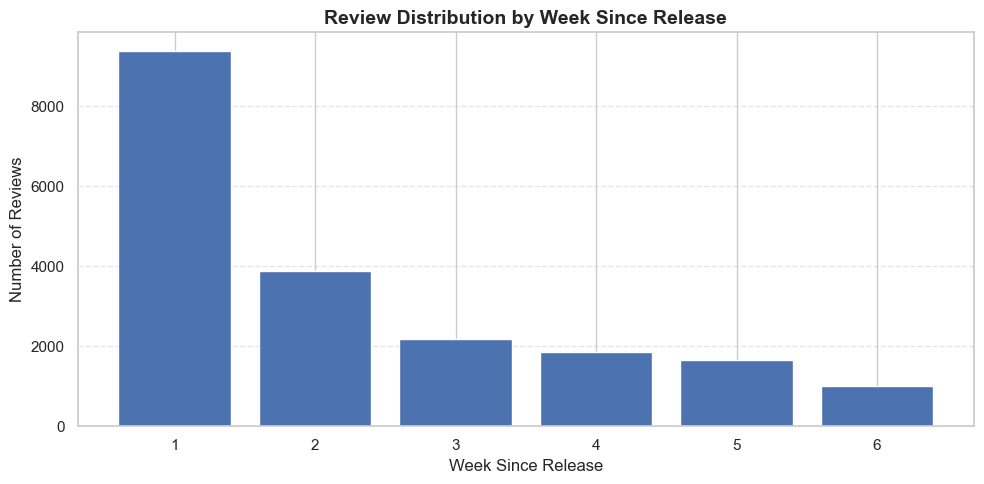

In [691]:
# Count number of reviews per week
review_week_counts = df_reviews_filtered['review_week'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(review_week_counts.index, review_week_counts.values, color="#4C72B0")

# Labels and title
plt.title("Review Distribution by Week Since Release", fontsize=14, weight='bold')
plt.xlabel("Week Since Release", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(review_week_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
